<a href="https://colab.research.google.com/github/SHUBHR1005/MAIN-PROJECTS/blob/main/K_MEANS_CUSTOMER_SEGMENTATION_AND_MARKET_BASKET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Arial" size="12" color="royalblue"><b>$\blacksquare$CUSTOMER SEGMENTATION AND MARKET BASKET ANALYSIS</b></font>

---



>[$\blacksquare$CUSTOMER SEGMENTATION AND MARKET BASKET ANALYSIS](#scrollTo=k2ybpUBDuUPP)

>[ABOUT THIS NOTEBOOK](#scrollTo=Fd0bAd-6xC2K)

>[LIBRARIES](#scrollTo=oJFzI4Qqym32)

>[DATA PREPARATION](#scrollTo=16adx4fv3YGA)

>>[DATA](#scrollTo=Eiayuziry0fd)

>>[DATA DESCRIPTION AND INFORMATION](#scrollTo=3hKBen2T0lLq)

>>>[DATA INFORMATION](#scrollTo=NXe06g4425Gi)

>>>[DATA DESCRIPTION](#scrollTo=paMUBW4E2zcK)

>>[HANDLING MISSING DATA](#scrollTo=IklUWb4-2Ylg)

>[EXPLORING THE VARIABLES](#scrollTo=4_Ivob983izB)

>>>[MARKET ANALYSIS](#scrollTo=bN3IiTvA_tlQ)

>>>[CUSTOMERS AND PRODUCTS](#scrollTo=xI9XuBcCEX2q)

>>>[STOCK CODES](#scrollTo=8FT4MdvTE0DT)

>>>[BASKET PRICE](#scrollTo=eoPomY0UF0LG)

>[INSIGHTS ON PRODUCTS](#scrollTo=ikpryjOkcQRg)

>>>[PRODUCT DESCRIPTION](#scrollTo=RWHTUbfun-1_)

>[$\star$ CUSTOMER SEGMENTATION](#scrollTo=DghYHeidsqXC)

>[RFM ANALYSIS](#scrollTo=ei2Vt3GhzZsD)

>>>[RECENCY](#scrollTo=hb4bEfE63rRw)

>>>[FREQUENCY](#scrollTo=AuVv1ifHZf4d)

>>>[MONEYTARY VALUE](#scrollTo=1yogJpoXkupZ)

>>>[DATA PREPROCESSING](#scrollTo=wpGkj4o0iC87)

>[CLUSTERING OF SEGMENTS](#scrollTo=ZjXTA9KK7tCK)

>>>[K-Means Clustering](#scrollTo=xmqBf4OrScML)

>>>[The Elbow Method](#scrollTo=X9gBv6szSxhs)

>>>[Silhouette analysis on K-Means clustering](#scrollTo=0ZaK39HxVKMM)

>>>[Clusters Center:](#scrollTo=AD8UKvIEYCQr)

>[$\star$ CROSS SELLING](#scrollTo=SYUCwkRasa55)

>[MARKET BASKET ANALYSIS WITH ASSOCIATION RULE-MINING](#scrollTo=2hoN3y0tz-vc)

>>>[TRANSACTION DATASET](#scrollTo=TzyD3sPY-EAB)

>>>[PRUNE DATASET FOR FREQUENT ITEMSETS](#scrollTo=LSb4nUAx-MPC)

>>>[ASSOCIATION RULE MINING](#scrollTo=lTH5gQglPCy_)

>[MARKET BASKET ANALYSIS CONCLUSION](#scrollTo=iig27JCoRQwU)



# <font face="Arial" size="5" color="royalblue"><b>ABOUT THIS NOTEBOOK</b></font>

---

The Online Retail a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

But first, let's see some deep understand of both concepts:

* **Customer segmentation:** Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

* **Market basket analysis:** Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

# <font face="Arial" size="5" color="royalblue"><b>LIBRARIES</b></font>

---

In [1]:
!pip3 install Orange3-Associate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.3/513.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.4 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import datetime as dt
import matplotlib.cm as cm
import math
import matplotlib.patches as mpatches
import plotly.express as px
import itertools
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from pathlib import Path
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, probplot
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from mlxtend.frequent_patterns import apriori, association_rules
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# <font face="Arial" size="5" color="royalblue"><b> DATA PREPARATION </b></font>

---

## <font face="Arial" size="5" color="royalblue"><b>DATA</b></font>

---

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT DATASETS/Customer_Segmentation.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


This dataframe contains 8 variables that correspond to:

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* **Description:** Product (item) name. Nominal.

* **Quantity:** The quantities of each product (item) per transaction. Numeric.

* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* **Country:** Country name. Nominal, the name of the country where each customer resides.

## <font face="Arial" size="5" color="royalblue"><b>DATA DESCRIPTION AND INFORMATION</b></font>

---

### DATA INFORMATION

In [5]:
#Get the information for the DataFrame
column_names = df.columns
non_null_counts = df.count()
data_types = df.dtypes

# Create a DataFrame to hold the information
info_df = pd.DataFrame({
    'Column Name': column_names,
    'Non-Null Count': non_null_counts,
    'Data Type': data_types
})

# Display the information DataFrame
info_df

,Column Name,Non-Null Count,Data Type
InvoiceNo,InvoiceNo,541909,object
StockCode,StockCode,541909,object
Description,Description,540455,object
Quantity,Quantity,541909,int64
InvoiceDate,InvoiceDate,541909,object
UnitPrice,UnitPrice,541909,float64
CustomerID,CustomerID,406829,object
Country,Country,541909,object


### DATA DESCRIPTION

In [6]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## <font face="Arial" size="5" color="royalblue"><b>HANDLING MISSING DATA</b></font>

---

In [7]:
# Step 1: Total number of missing values in each column
missing_values_count = df.isnull().sum()

# Step 2: Total number of rows in the DataFrame
total_rows = df.shape[0]

# Step 3: Percentage of missing values for each column
percentage_missing_values = (missing_values_count / total_rows) * 100

# Step 4: New DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Variables': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage Missing': percentage_missing_values.values
})

# Step 5: Sort the DataFrame by percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Percentage Missing')

# Step 6: DataFrame with missing value information
missing_values_df

,Variables,Missing Values,Percentage Missing
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000
2,Description,1454,0.268311
6,CustomerID,135080,24.926694


While looking at the number of null values in the dataframe, it is interesting to note that ∼ 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:



In [8]:
df = df.dropna(subset=['CustomerID'])

# <font face="Arial" size="5" color="royalblue"><b> EXPLORING THE VARIABLES</b></font>

---



### <font face="Arial" size="5" color="royalblue"><b>MARKET ANALYSIS</b></font>

---

<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF ORDERS PER COUNTRY</b></font>

---

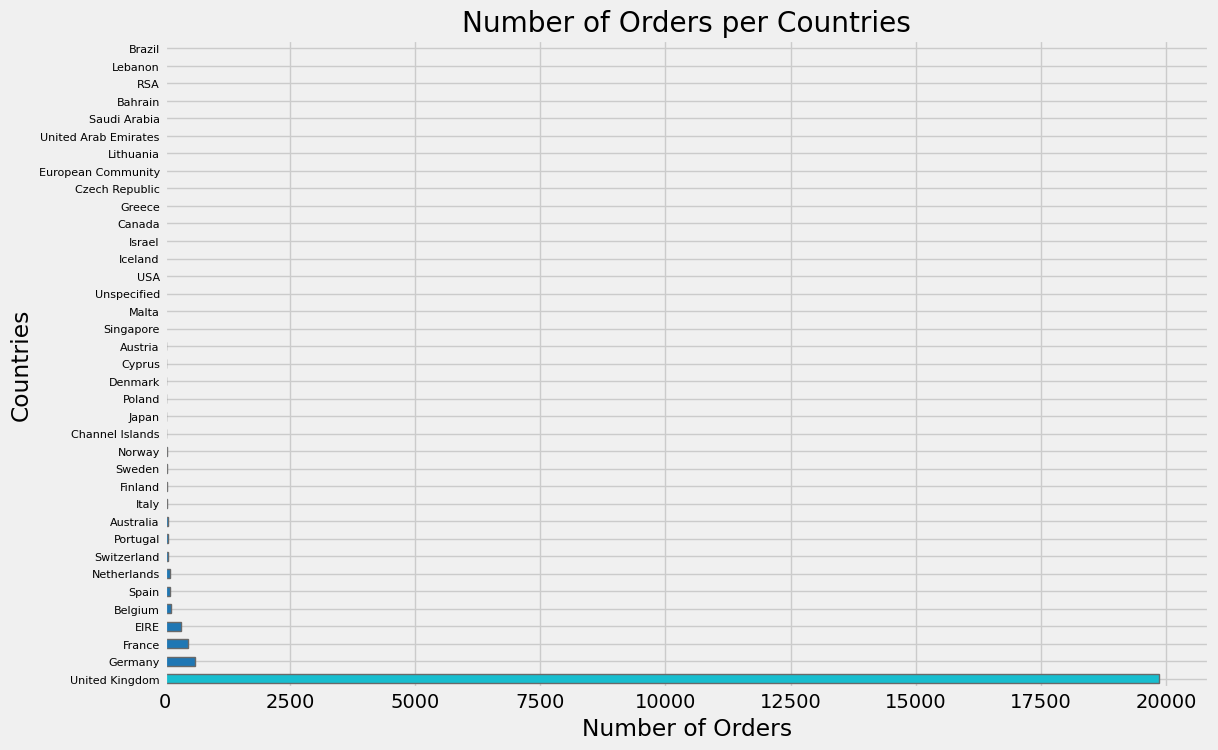

In [9]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp=temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
plt.figure(figsize=(12, 8))
ax = countries.plot(kind='barh', color=plt.cm.get_cmap('tab10')(countries/float(countries.max())))
plt.title('Number of Orders per Countries')
plt.xlabel('Number of Orders')
plt.ylabel('Countries')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

We see that the dataset is largely dominated by orders made from the UK.



<font face="Arial" size="4" color="royalblue"><b>B. INTERNAL MARKET</b></font>

---

Since this company is UK based, so we consider the market of UK as the internal market and other countires as external market.

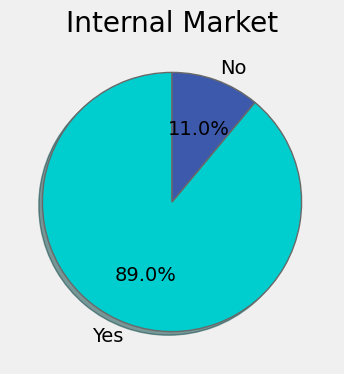

In [10]:
df['Internal'] = df.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
# Count the occurrences of 'Internal'
internal_market = df['Internal'].value_counts()

# Create a pie plot
plt.figure(figsize=(4,4))
plt.pie(internal_market, labels=internal_market.index, autopct='%1.1f%%', startangle=90, colors=['#00CDCD', '#3D59AB'],shadow=True)
plt.title('Internal Market')
plt.show()

### <font face="Arial" size="5" color="royalblue"><b>CUSTOMERS AND PRODUCTS</b></font>

---  
  


<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF USERS AND PRODUCTS</b></font>

---

In [11]:
pd.DataFrame([{'products':df['StockCode'].nunique(),
               'transactions': df['InvoiceNo'].nunique(),
               'customers': df['CustomerID'].nunique(),
              }], columns = ['products', 'transactions', 'customers'], index = ['Unique Quantity'])

,products,transactions,customers
Unique Quantity,3684,22190,4372


It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out is of the order of  ∼ 22'190.

<font face="Arial" size="4" color="royalblue"><b>B. NUMBER OF PRODUCTS PURCHASED IN EVERY TRANSACTION</b></font>

---


In [12]:
temp1 = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp1.rename(columns = {'InvoiceDate':'Number of products'})

temp2 = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].count()
customer_product_count = temp2.rename(columns={'InvoiceDate': 'Number of products'})

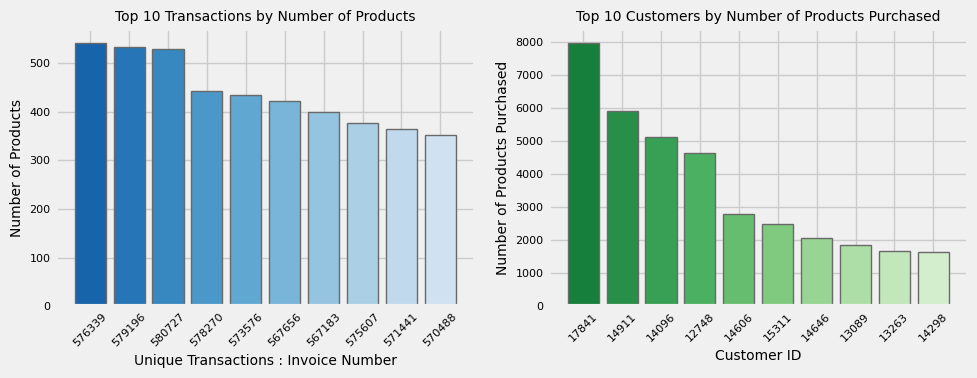

In [13]:
# Get the top 10 transactions by number of items
top_10_transactions = nb_products_per_basket.sort_values(by='Number of products', ascending=False).head(10)

# Get the top 10 customers by the maximum amount of products purchased
top_10_customers = customer_product_count.sort_values(by='Number of products', ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot top 10 transactions
bar_colors1 = plt.cm.get_cmap('Blues')(np.linspace(0.8, 0.2, len(top_10_transactions)))
axes[0].bar(top_10_transactions['InvoiceNo'], top_10_transactions['Number of products'], color=bar_colors1)
axes[0].set_xlabel('Unique Transactions : Invoice Number',fontdict={'size': 10})
axes[0].set_ylabel('Number of Products',fontdict={'size': 10})
axes[0].set_title('Top 10 Transactions by Number of Products',fontdict={'size': 10})
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)
# Plot top 10 customers
bar_colors2 = plt.cm.get_cmap('Greens')(np.linspace(0.8, 0.2, len(top_10_customers)))
axes[1].bar(top_10_customers['CustomerID'], top_10_customers['Number of products'], color=bar_colors2)
axes[1].set_xlabel('Customer ID',fontdict={'size': 10})
axes[1].set_ylabel('Number of Products Purchased',fontdict={'size': 10})
axes[1].set_title('Top 10 Customers by Number of Products Purchased',fontdict={'size': 10})
axes[1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1].tick_params(axis='y', rotation=0, labelsize=8)
plt.tight_layout()
plt.show()

<font face="Arial" size="4" color="royalblue"><b>C. ANALYSIS OF CANCELLED TRANSACTIONS AND NEGATIVE QUANTITIES</b></font>

---

In [14]:
# Display only the canceled transactions with invoice numbers beginning with 'C'
canceled_transactions = nb_products_per_basket[nb_products_per_basket['InvoiceNo'].str.startswith('C')]
canceled_transactions.head(10)

,CustomerID,InvoiceNo,Number of products
1,12346,C541433,1
23,12352,C545329,2
24,12352,C545330,1
25,12352,C547388,7
39,12359,C549955,2
40,12359,C580165,4
55,12362,C544902,2
56,12362,C563752,3
57,12362,C579178,3
66,12365,C544577,1


In [15]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 (16.47%) 


We note that the number of cancellations is quite large ( ∼16% of the total number of transactions).

Now we encounter several ocations where the quantity is in negative.

In [16]:
df.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Internal
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,Yes
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom,Yes
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,8/2/2011 8:48,2.25,12347,Iceland,No
72263,542237,47559B,TEA TIME OVEN GLOVE,10,1/26/2011 14:30,1.25,12347,Iceland,No
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,1/26/2011 14:30,1.25,12347,Iceland,No


On these few lines, we see that when an order is canceled, we have another transactions in the dataframe, mostly identical except for the Quantity and InvoiceDate variables. I decide to check if this is true for all the entries. To do this, I decide to locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice).

**Hypothesis:** For transactions with a negative quantity of items, there should be corresponding transactions with a positive quantity for the same customer, same item description, and the same magnitude of quantity but with a positive value. In other words, if a customer is involved in a transaction with a negative quantity, there should be a corresponding transaction indicating that the same customer purchased the same item, but with a positive quantity.

In [17]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


CustomerID: 14527

Quantity: -1 (Negative quantity, which could represent a return or cancellation)

StockCode: D (This StockCode indicate a discount)

Description: Discount (The description of the item, which confirms that it's a discount)

UnitPrice: 27.5 (The unit price of the discount, indicating the amount of the reduction)

From this data, it appears that the transaction involves a negative quantity with the description "Discount," which implies that the customer received a discount of 27.5 units of currency on the corresponding order. The presence of "Discount" in the description, combined with the negative quantity, suggests that this entry represents a discount applied to a purchase.

 We now filter out rows with the description "Discount" before checking whether the hypothesis about negative quantities of items is fulfilled. It identifies cases where there are negative quantity transactions without corresponding positive quantity transactions for the same customer and item description (excluding "Discount" items).

In [18]:
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Once more, we find that the initial hypothesis is not verified. Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.

At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database). Below, I make a census of the cancel orders and check for the existence of counterparts:

In [19]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) &
                         (df['InvoiceDate'] < col['InvoiceDate']) &
                         (df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index)
            break

In the above function, I checked the two cases:

1. a cancel order exists without counterpart.

2. there's at least one counterpart with the exact same quantity.

If no counterparts are found, the index of the current row is added to `doubtful_entry`. If one counterpart is found, the corresponding index is stored in index_order, and the '`QuantityCanceled`' value for that counterpart is updated. If multiple counterparts are found, the code sorts them in descending order and iterates through them. The first counterpart with a positive quantity greater than or equal to the negative quantity of the current row will have the '`QuantityCanceled`' value updated, and the index of the current row is added to `entry_to_remove`.

In [20]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6168
doubtfull_entry: 2616


Among these entries, those listed in the doubtfull_entry list correspond to cancellation records that lack a preceding order. In practice, I've chosen to remove all of these entries, which make up approximately 1.4% and 0.2% of the total DataFrame entries.

Now, I am examining the count of cancellation entries that remain after the previous filtering step, where I have not deleted them.

In [21]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("Number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

Number of entries to delete: 44


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Internal,QuantityCanceled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796,United Kingdom,Yes,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748,United Kingdom,Yes,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911,EIRE,No,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911,EIRE,No,0
58496,C541245,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-12,1/16/2011 12:40,4.25,15535,United Kingdom,Yes,0


### <font face="Arial" size="5" color="royalblue"><b>STOCK CODES</b></font>

---  

In [22]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes_df = pd.DataFrame(list_special_codes, columns=["SPECIAL CODES"])
special_codes_df

,SPECIAL CODES
0,POST
1,D
2,C2
3,M
4,BANK CHARGES
5,PADS
6,DOT


In [23]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


### <font face="Arial" size="5" color="royalblue"><b>BASKET PRICE</b></font>

---  

I am generating a new variable that denotes the total price for each purchase:

In [24]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Internal,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,Yes,74215,0.00
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/2011 8:48,12.75,12347,Iceland,No,0,38.25
72274,542237,84558A,3D DOG PICTURE PLAYING CARDS,12,1/26/2011 14:30,2.95,12347,Iceland,No,0,35.40
72273,542237,21731,RED TOADSTOOL LED NIGHT LIGHT,12,1/26/2011 14:30,1.65,12347,Iceland,No,0,19.80
72272,542237,22497,SET OF 2 TINS VINTAGE BATHROOM,4,1/26/2011 14:30,4.25,12347,Iceland,No,0,17.00


In the provided table, each DataFrame entry represents prices for a specific type of product. Consequently, orders are divided into multiple rows. My objective is to aggregate all purchases associated with a single order in order to retrieve the total order price:

In [25]:
# Grouping and aggregating purchase data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})
# Converting 'InvoiceDate' to datetime data type
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
# Grouping and working with datetime data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].mean()
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
# Filtering out entries with non-positive basket price
basket_price = basket_price[basket_price['Basket Price'] > 0]
# Sorting the DataFrame
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000000000
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:43:00.000000000
4,12347,556201,382.52,2011-06-09 13:01:00.000000000
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000000000


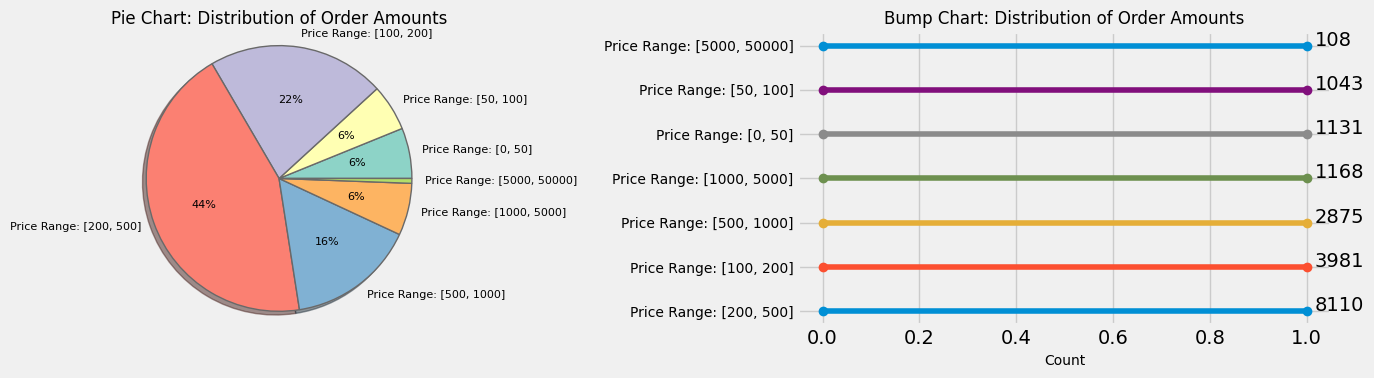

In [26]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0:
        continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
labels = ['Price Range: [{}, {}]'.format(price_range[i-1], s) for i, s in enumerate(price_range) if i != 0]
bump_data = pd.DataFrame({'Price Range': labels, 'Count': count_price})
bump_data.sort_values(by='Count', ascending=False, inplace=True)
bump_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sizes = count_price
colors = plt.cm.Set3.colors
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
       shadow=True, startangle=0, textprops={'fontsize': 8})  # Adjust fontsize here
plt.axis('equal')
plt.title("Pie Chart: Distribution of Order Amounts",  fontdict={'size': 12})
plt.subplot(1, 2, 2)
for i, row in bump_data.iterrows():
    plt.plot([0, 1], [i, i], marker='o', label=row['Price Range'])
    plt.annotate(f'{row["Count"]}', xy=(1, i), xytext=(6, 0), textcoords='offset points')

plt.yticks(bump_data.index, bump_data['Price Range'], fontdict={'size': 10})
plt.xlabel('Count', fontdict={'size': 10})
plt.title('Bump Chart: Distribution of Order Amounts', fontdict={'size': 12})
plt.tight_layout()
plt.show()

It's apparent that a substantial majority of orders revolve around comparatively sizable purchases, as roughly 65% of transactions result in amounts surpassing £200. Furthermore, approximately 44% of order values lie within the £200 to £500 range. This bump plot visually displays rank changes across price categories. Vertical lines depict the trajectory of each category, highlighting shifts in rank positions. It's effective for revealing trends and comparing relative changes, making it useful for showcasing shifts in market dynamics and the historical evolution of price distribution.

# <font face="Arial" size="5" color="royalblue"><b>INSIGHTS ON PRODUCTS</b></font>

---


In the dataset, each product is distinguished by a unique StockCode value. The Description variable contains a brief overview of the products. In this segment, my aim is to utilize the information in the Description variable to categorize the products into various groups.

### <font face="Arial" size="5" color="royalblue"><b>PRODUCT DESCRIPTION</b></font>

---

As an initial step, I am extracting pertinent information from the 'Description' variable utilizing the following function.

In [27]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1

    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords


This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

* extract the names (proper, common) appearing in the products description

* for each name, I extract the root of the word and aggregate the set of names associated with this particular root

* count the number of times each root appears in the dataframe

* when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [28]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

Once this list is created, I use the function I previously defined in order to analyze the description of the various products:



In [29]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Number of keywords in variable 'Description': 1483


The execution of this function returns three variables:

* `keywords:` the list of extracted keywords

* `keywords_roots:` a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

* `count_keywords:` dictionary listing the number of times every word is used

At this point, I convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences:

In [30]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

Using it, I create a representation of the most common keywords:

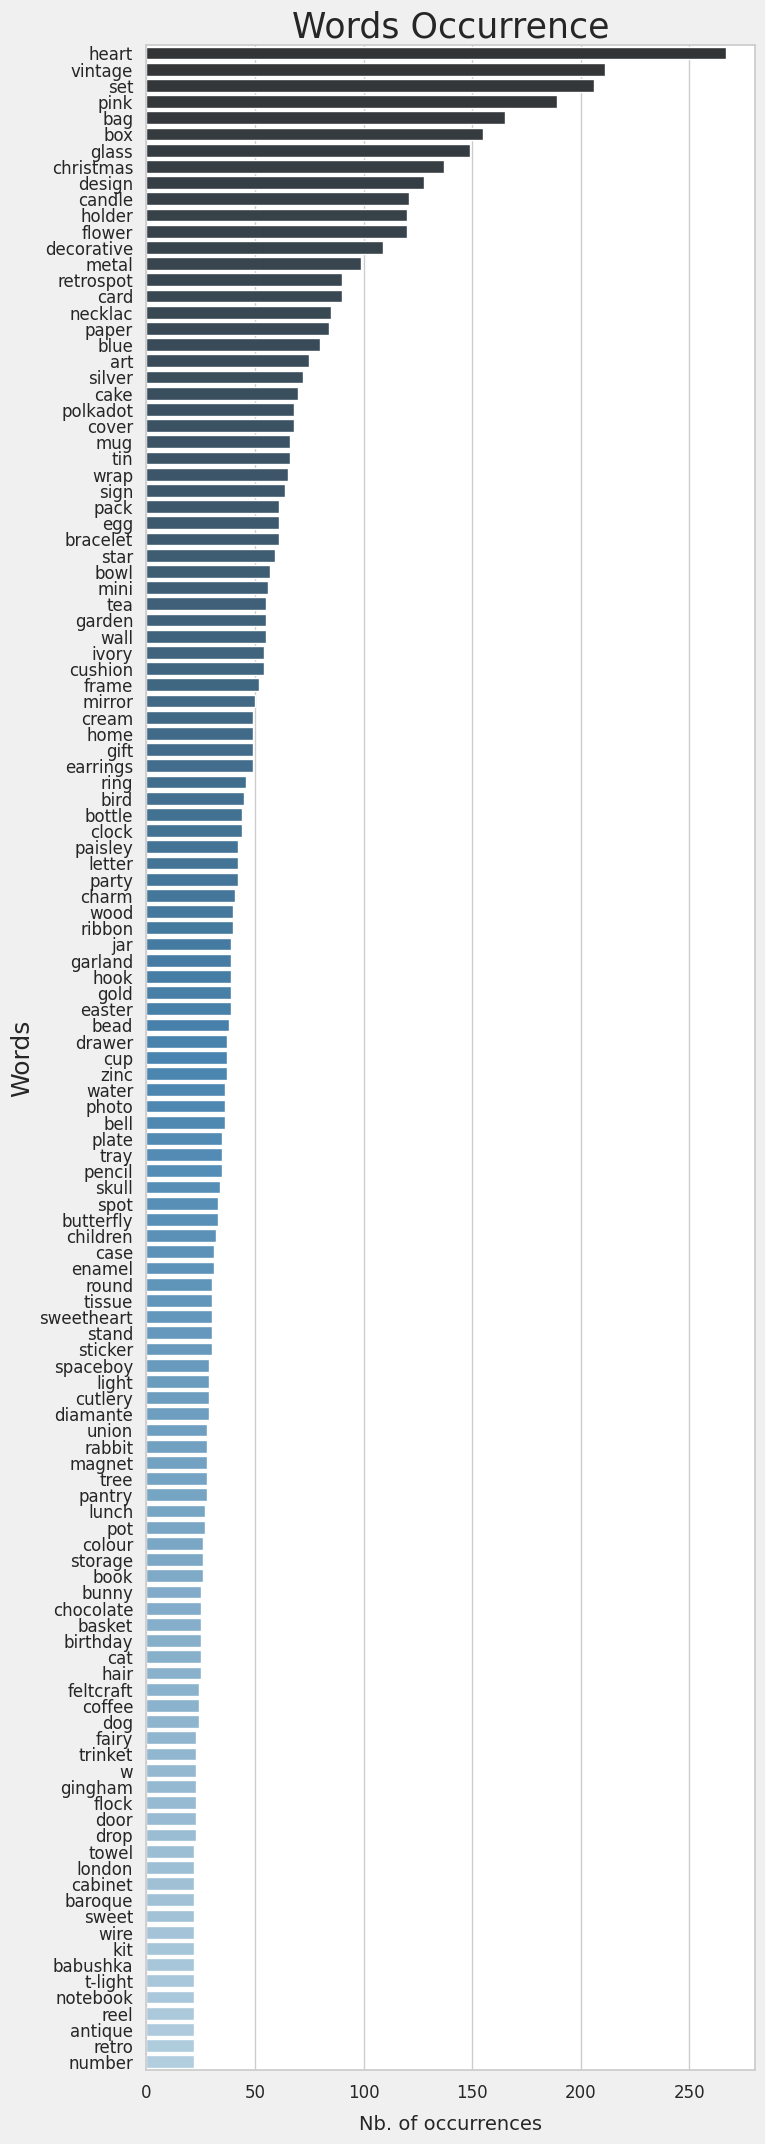

In [31]:
# Assuming 'liste' contains the data
liste = sorted(list_products, key=lambda x: x[1], reverse=True)
y_axis = [i[1] for i in liste[:125]]
x_label = [i[0] for i in liste[:125]]

plt.rc('font', weight='normal')
plt.figure(figsize=(7, 25))

sns.set(style="whitegrid")

# Reversed color palette
color_palette = sns.color_palette("Blues_d", len(x_label))[::-1]

ax = sns.barplot(x=y_axis, y=x_label, palette=color_palette)

plt.xlabel("Nb. of occurrences", fontsize=14, labelpad=10)
plt.ylabel("Words", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Words Occurrence", fontsize=25)

plt.show()

# <font face="Arial" size="10" color="GREEN"><b> $\star$ CUSTOMER SEGMENTATION</b></font>

---

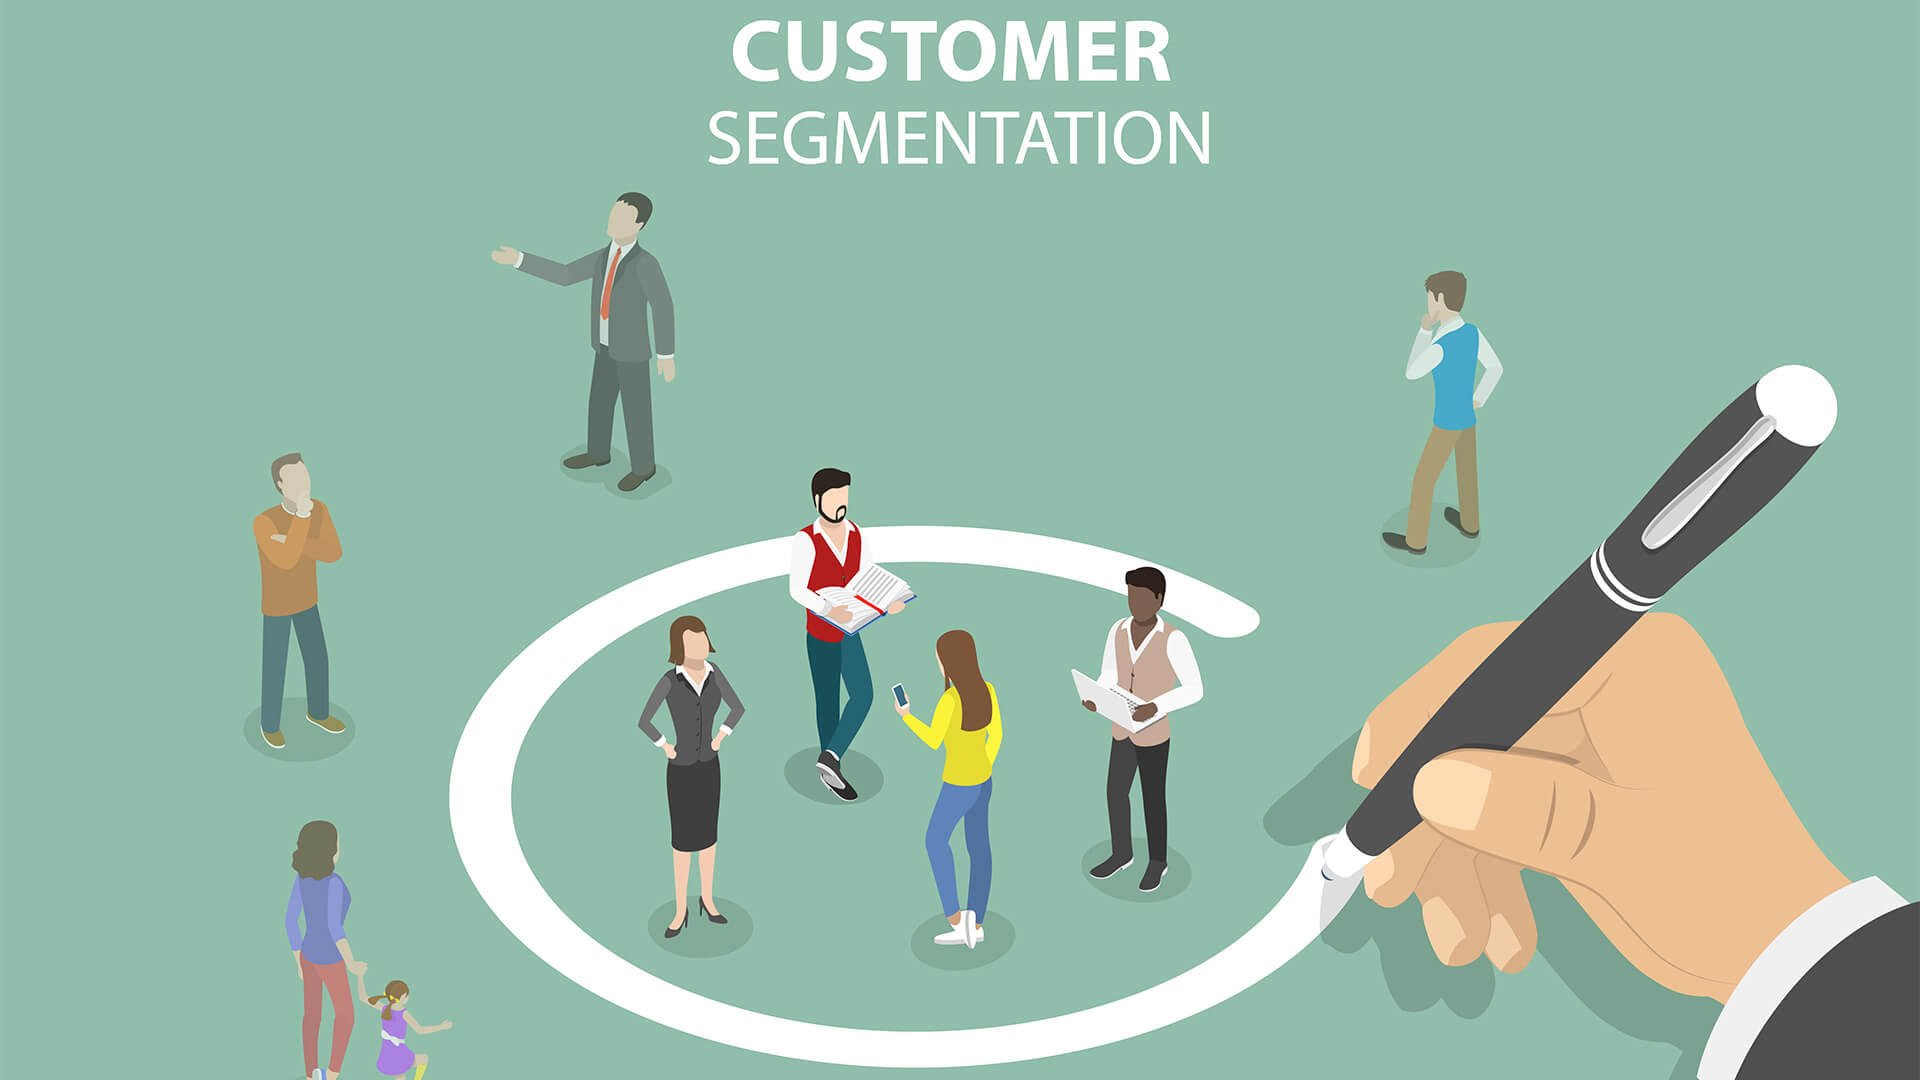

Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

* **Higher Revenue:** This is the most obvious requirement of any customer segmentation project.

* **Customer Understanding:** One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.

* **Target Marketing:** The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.

* **Optimal Product Placement:** A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.

* **Finding Latent Customer Segments:** Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

# <font face="Arial" size="5" color="royalblue"><b> RFM ANALYSIS</b></font>

---



**RFM Model for Customer Value:**
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a **RFM(Recency, Frequency and Monetary Value)**, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

* **Recency:** The value of how recently a customer purchased at the establishment.

* **Frequency:** How frequent the customer’s transactions are at the establishment.

* **Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment.




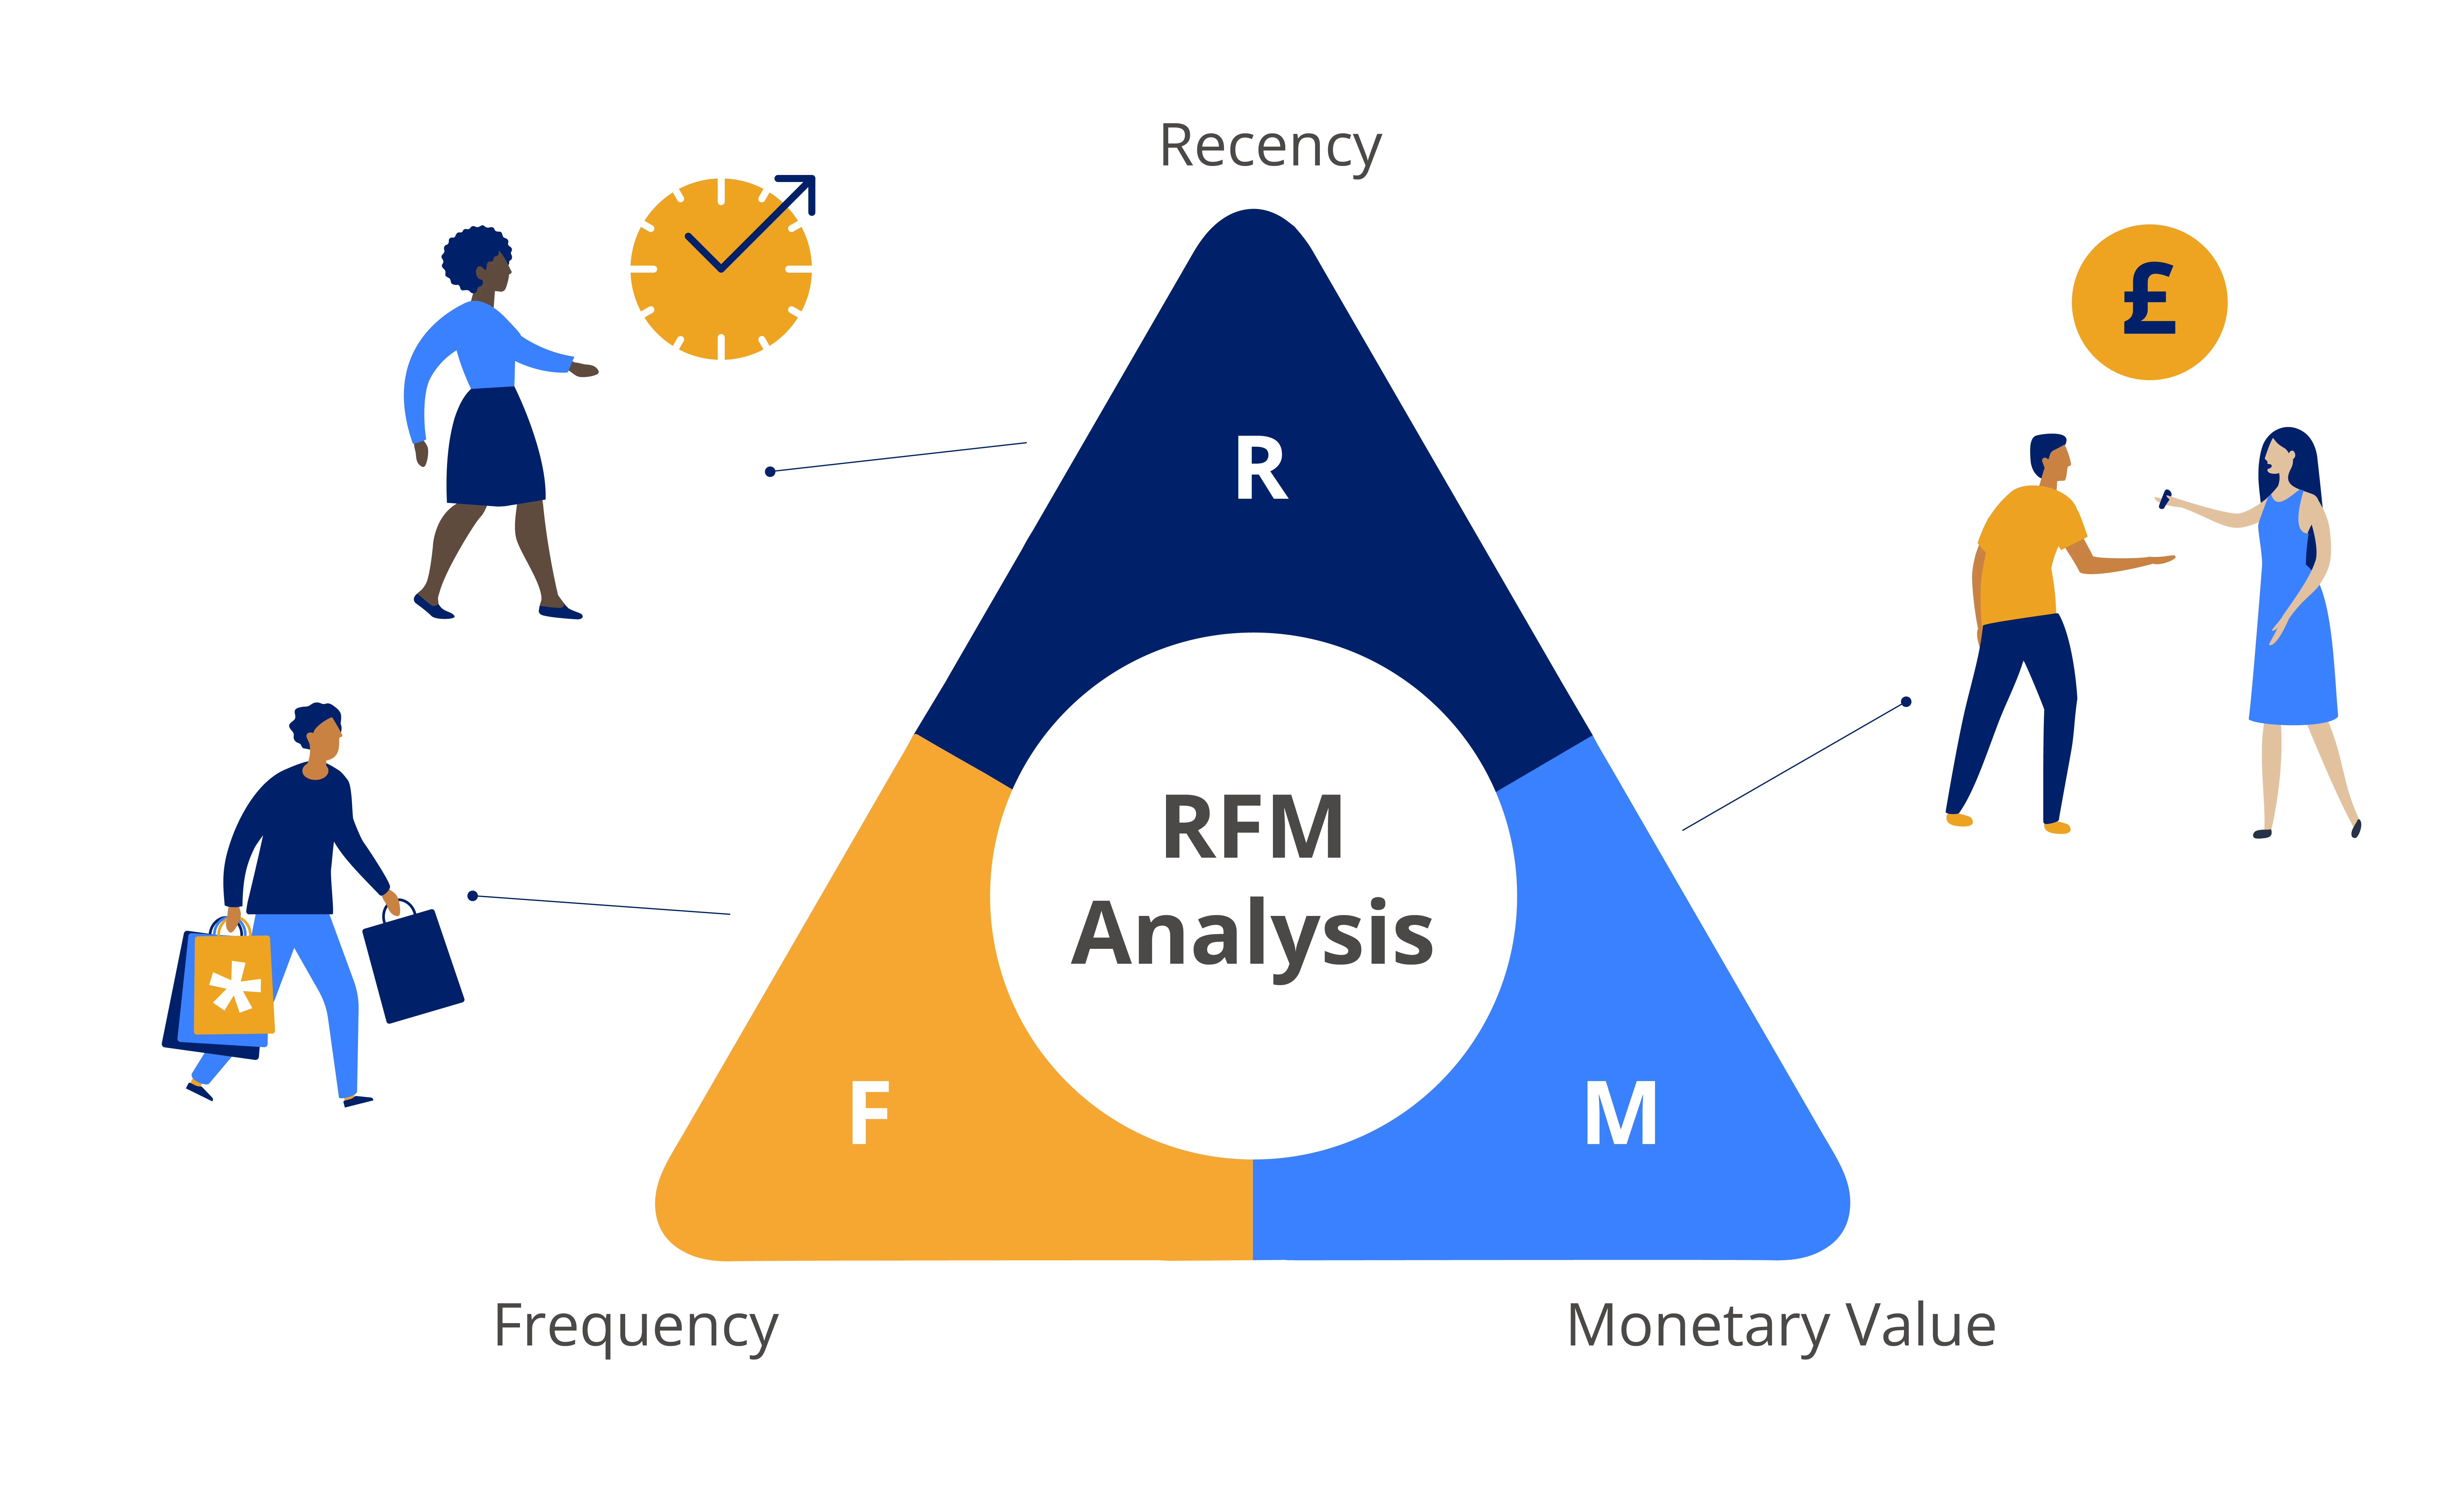

### <font face="Arial" size="5" color="royalblue"><b>RECENCY</b></font>

---

To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [63]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the reference date as the maximum InvoiceDate + 1 day
reference_date = df.InvoiceDate.max() + dt.timedelta(days=1)
print('Reference Date:', reference_date)

# Calculate days since last purchase and add it as a new column
df['days_since_last_purchase'] = (reference_date - df.InvoiceDate).dt.days

# Create a customer history DataFrame with recency
customer_history_df = df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)

# Display summary statistics of the customer history DataFrame
customer_history_df.describe().transpose()

Reference Date: 2011-12-10 12:50:00


,count,mean,std,min,25%,50%,75%,max
recency,4372.0,92.047118,100.765435,1.0,17.0,50.0,143.0,374.0


We will plot the Recency Distribution and QQ-plot to identify substantive departures from normality, likes outliers, skewness and kurtosis.

**Recency Distribution Plot:**
The Recency Distribution plot (usually in the form of a histogram or a density plot) helps us to understand how recency values are distributed across your customer base.

**QQ-Plot for Normality Assessment:**
A QQ-plot is a graphical tool used to assess whether a dataset follows a normal distribution (bell curve). In a QQ-plot, the quantiles of the data are compared to the quantiles of a theoretical normal distribution. If the points on the QQ-plot closely follow a straight line, it indicates that the data is approximately normally distributed. If the points deviate from the line, it suggests departures from normality, such as outliers, skewness (asymmetry), or kurtosis (peakedness).

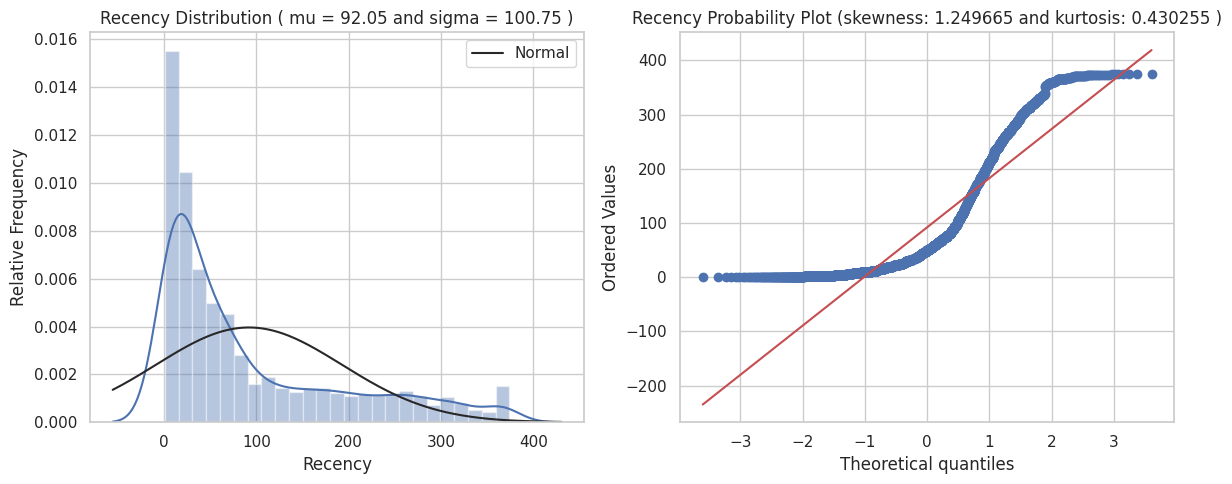

In [64]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12, 5))

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm, fit_kws={'label': 'Normal'})
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center', fontdict={'size': 12})
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Relative Frequency')
    fig1.legend()  # Add legend

    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center', fontdict={'size': 12})

    plt.tight_layout()
    plt.show()

# Example usage
QQ_plot(customer_history_df.recency, 'Recency')

* The sales recency distribution is skewed, with a peak on the left and a longer tail on the right, indicating positive bias.

* The probability plot confirms the right-skewed nature of the distribution.

* A positive skewness value of 1.25 confirms the right-skewed shape, indicating more data points on the right side.

* The sales distribution plot also demonstrates a longer tail on the right side, characteristic of right-skewed distributions.

* A positive kurtosis value of 0.43 indicates heavy-tailed behavior and the presence of outliers.

In summary, the sales recency distribution is positively skewed, with a prominent right-leaning tail and indications of heavy-tailed behavior and outliers.

### <font face="Arial" size="5" color="royalblue"><b>FREQUENCY</b></font>

---


The frequency of customer transactions at the establishment refers to how often customers make purchases. It can be measured by the average number of transactions within a given time period. Higher frequency indicates more frequent visits, while lower frequency suggests less frequent customer engagement with the establishment.

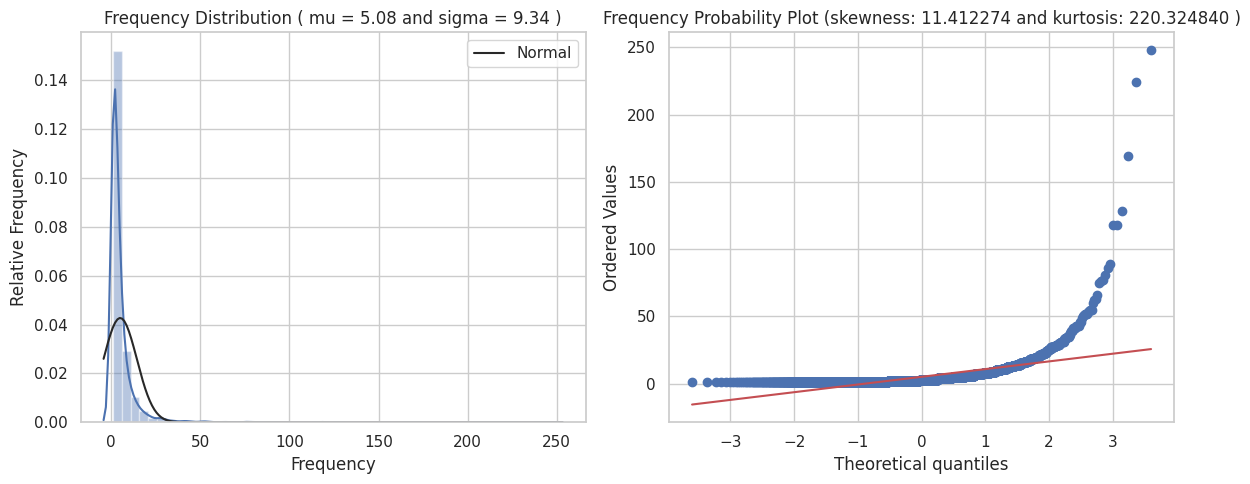

In [65]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')

* The sales frequency distribution shows left-side peaking and a longer right tail, indicating positive skewness and departure from normality.

* The probability plot confirms right-skewed shape.

* High positive skewness of 11.4 emphasizes strong asymmetry towards lower frequencies.

* Kurtosis of 220.32 indicates heavy-tailed distribution with outliers.

In summary, the sales frequency distribution is highly right-skewed, indicating infrequent high-frequency occurrences, and features heavy-tailed behavior with noticeable outliers.

### <font face="Arial" size="5" color="royalblue"><b>MONEYTARY VALUE</b></font>

---


The customer's monetary value of transactions at the establishment represents the total amount spent. It reflects the sum of dollars (or pounds) across all transactions made by the customer. This metric is crucial for assessing customer spending patterns, loyalty, and overall business revenue generation.

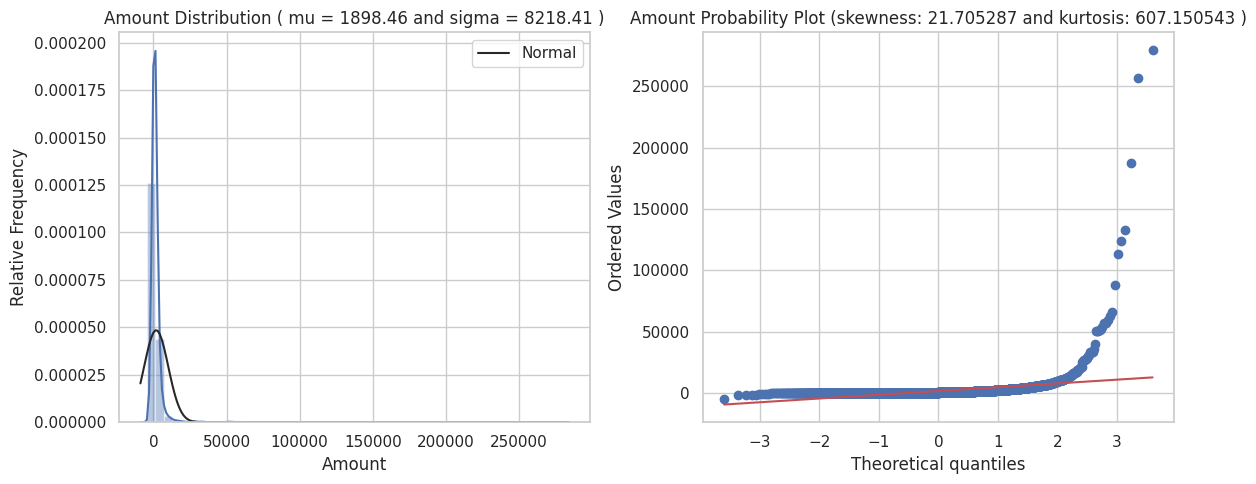

In [66]:
df['amount'] = df.Quantity*df.UnitPrice
customer_monetary_val = df[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'Amount')

* The sales amount distribution is skewed, with a left-sided peak and a long right tail, indicating positive bias and deviation from normality.

* The probability plot reinforces right-skewedness, particularly on the right side.

* A high positive skewness of 21.7 highlights significant asymmetry towards lower sales amounts.

* Kurtosis of 607 signifies a heavily tailed distribution with a notable presence of outliers, potentially including more than 10 extreme values.

In summary, the sales amount distribution is strongly right-skewed, demonstrating substantial positive bias, a heavy-tailed pattern with potential outliers, and departure from a normal distribution.

Let's see a statistical summary of this dataset:

In [67]:
customer_history_df.describe()

,recency,frequency,amount
count,4372.000000,4372.000000,4372.000000
mean,92.047118,5.075480,1898.459701
std,100.765435,9.338754,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,1.000000,293.362500
50%,50.000000,3.000000,648.075000
75%,143.000000,5.000000,1611.725000
max,374.000000,248.000000,279489.020000


### <font face="Arial" size="5" color="royalblue"><b>DATA PREPROCESSING </b></font>

---


Once we have created our customer value dataset, we will perform some preprocessing on the data. For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

An important point about the data preprocessing step is that sometimes we need it to be reversible. In our case, we will have the clustering results in terms of the log transformed and scaled variable. But to make inferences in terms of the original data, we will need to reverse transform all the variable so that we get back the actual RFM figures. This can be done by using the preprocessing capabilities of Python.

In [68]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
positive_amounts = customer_history_df['amount'][customer_history_df['amount'] > 0]
customer_history_df['amount_log'] = positive_amounts.apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
amount_log,4322.0,-6.247252e-17,1.000116,-22.183565,-0.445491,-0.019708,0.476246,3.296262
recency_log,4372.0,-1.625212e-17,1.000114,-2.548421,-0.613881,0.122738,0.840247,1.496706
frequency_log,4372.0,2.242793e-16,1.000114,-1.122728,-1.122728,0.029121,0.564700,4.657871


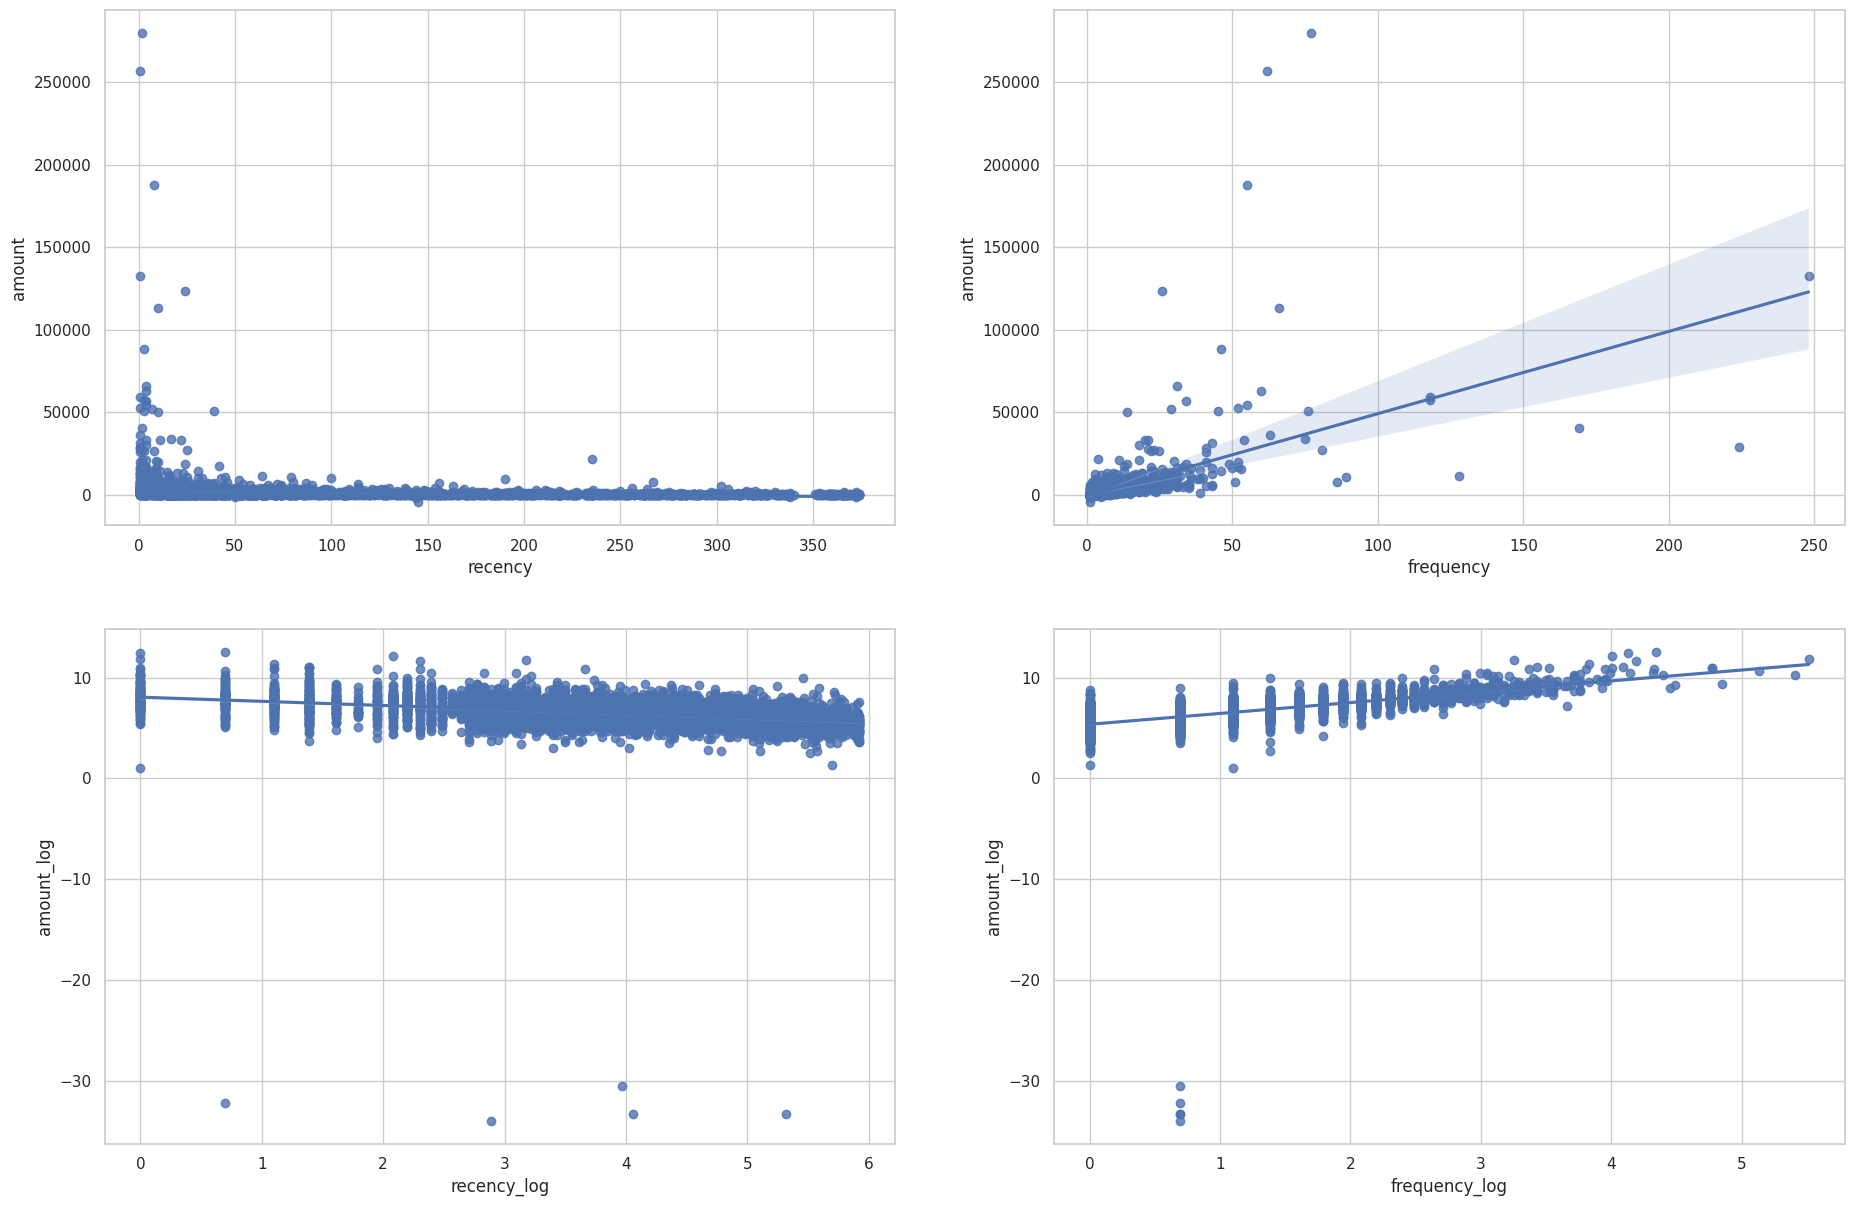

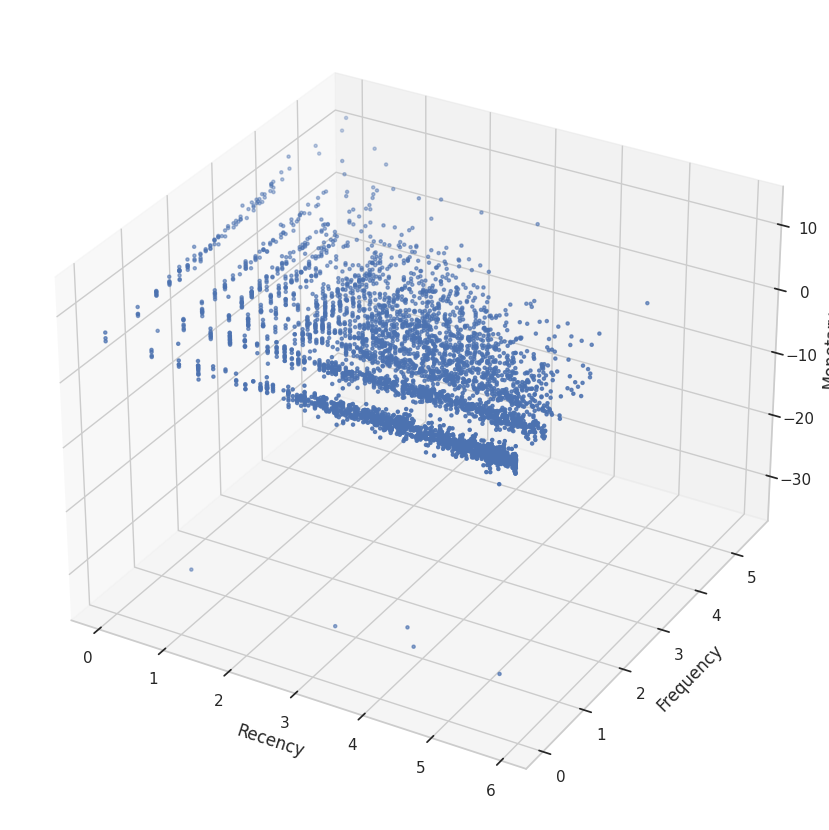

In [69]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

Evident trends can be observed in the provided plots, indicating that customers who make purchases more frequently and have made more recent purchases tend to exhibit higher spending. This is reflected in the ascending pattern of the Monetary values, coupled with a corresponding ascending trend for Frequency and a descending trend for Recency.

# <font face="Arial" size="5" color="royalblue"><b> CLUSTERING OF SEGMENTS</b></font>

---

### **K-Means Clustering**
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster.

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia. So, the objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function

The steps that happen in the K-means algorithm for partitioning the data are as given follows:

1. The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.
2. In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.
3. Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.
4. The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.

**K-means++**

* Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
* To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

### **The Elbow Method**
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

This method looks at the percentage of variance explained as a function of the number of clusters. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

In [70]:
from sklearn.impute import SimpleImputer

In [73]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(customer_history_df[['amount', 'recency', 'frequency']])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

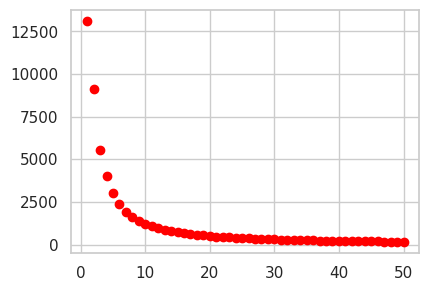

The best K sugest:  10


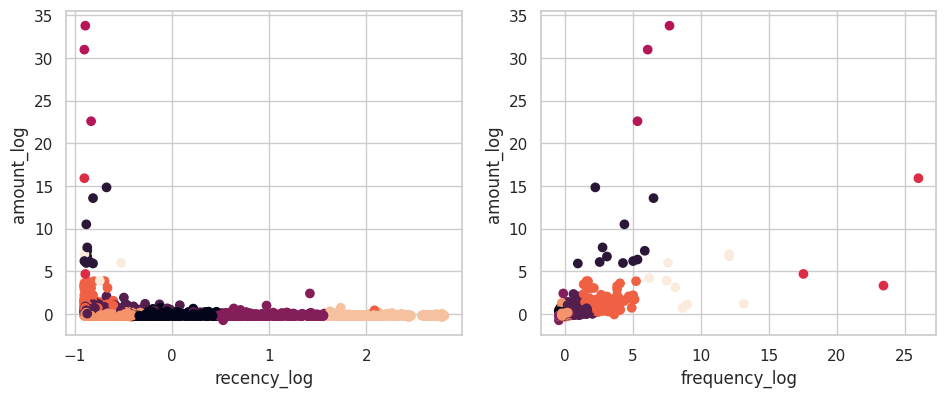

In [75]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(4, 3))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()


Note that by the Elbow method from a K equal to 6 we already observed low rates of gain in the decay of the distortions with the decrease of K reaching the limit of 10% with the K equal to 10. With this in mind, we will begin to evaluate the options more deeply with 3, and 10, starting with the silhouette analysis.

### **Silhouette analysis on K-Means clustering**
Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

It can also be applied to clustering algorithms other than k-means

Silhouette coefficients has a range of [-1, 1], it calculated by:

1. Calculate the cluster cohesion a( i )as the average distance between a sample x( i ) and all other points in the same cluster.
2. Calculate the cluster separation b( i ) from the next closest cluster as the average distance between the sample x( i ) and all samples in the nearest cluster.
3. Calculate the silhouette s( i ) as the difference between cluster cohesion and separation divided by the greater of the two, as shown here.

Where:

* If near +1, it indicate that the sample is far away from the neighboring clusters.
* a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
* If most objects have a high value, then the clustering configuration is appropriate.
* If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
* Negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette plot can shows a bad K clusters pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. A good k clusters can found when all the plots are more or less of similar thickness and hence are of similar sizes.

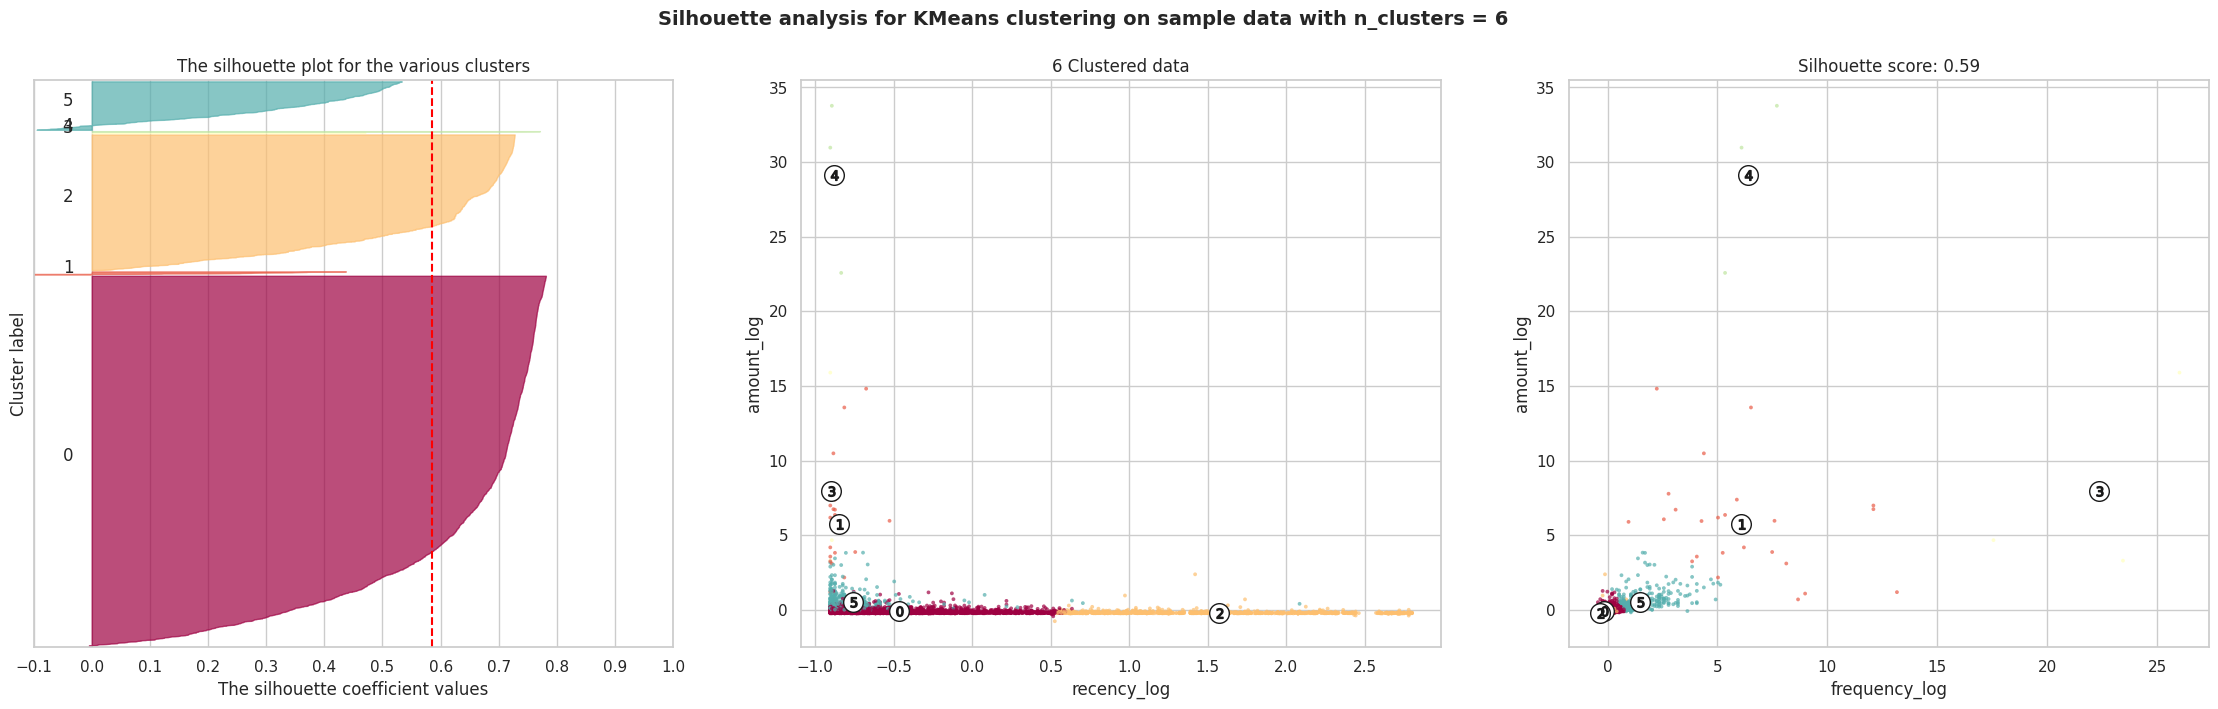

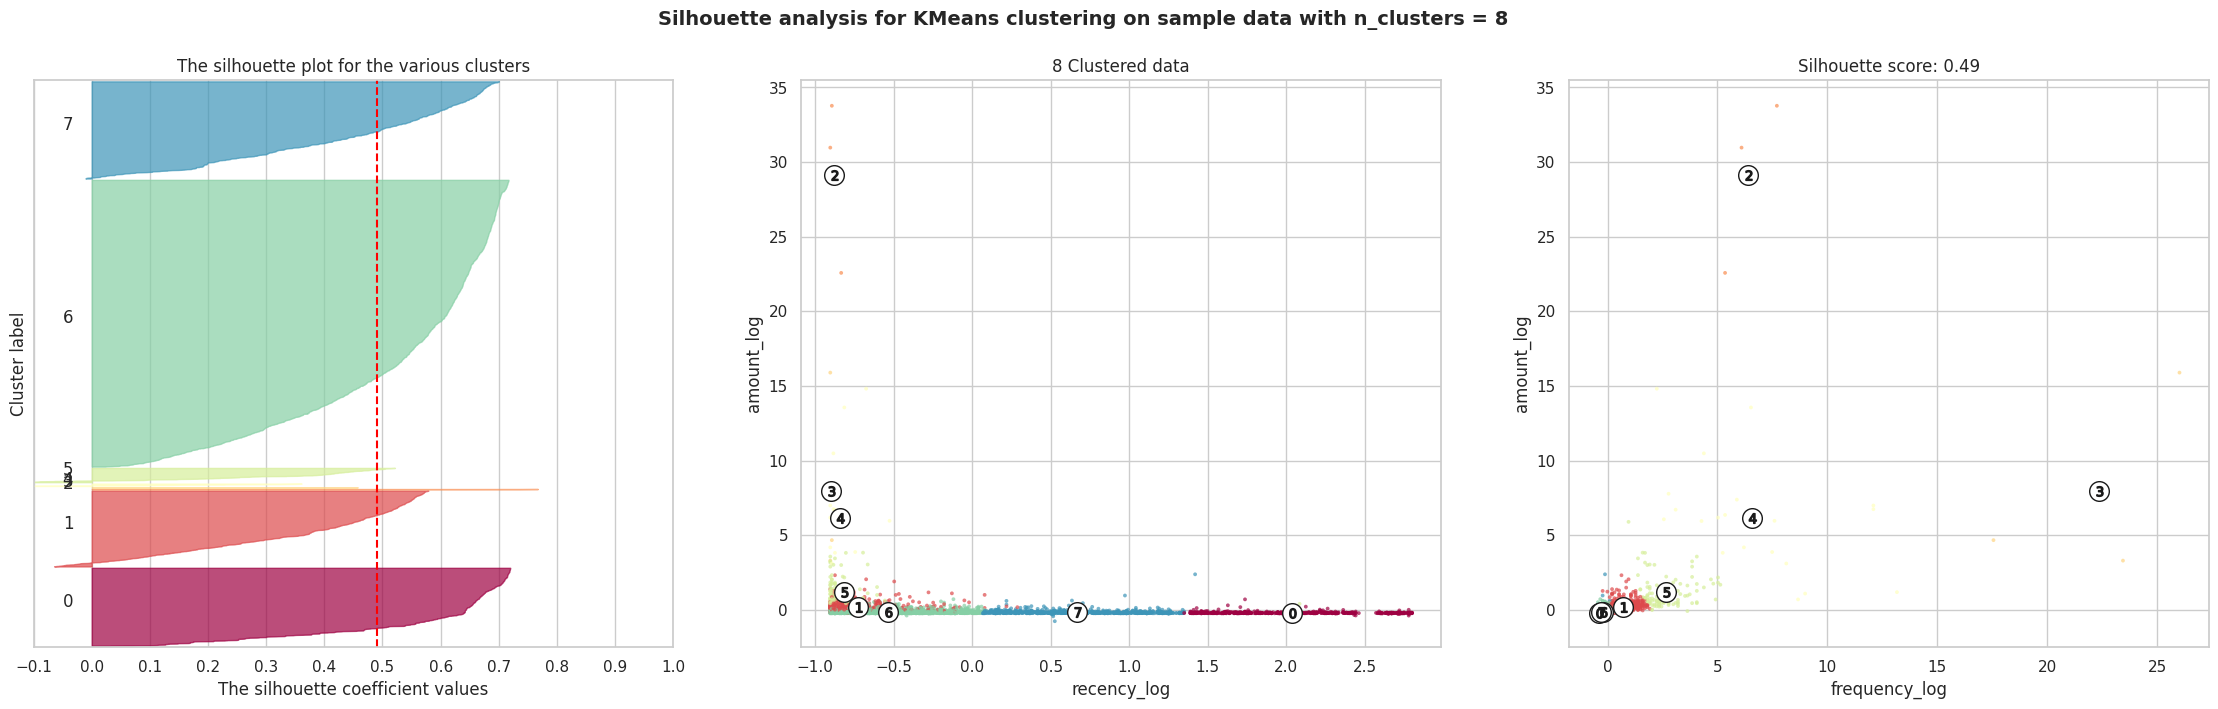

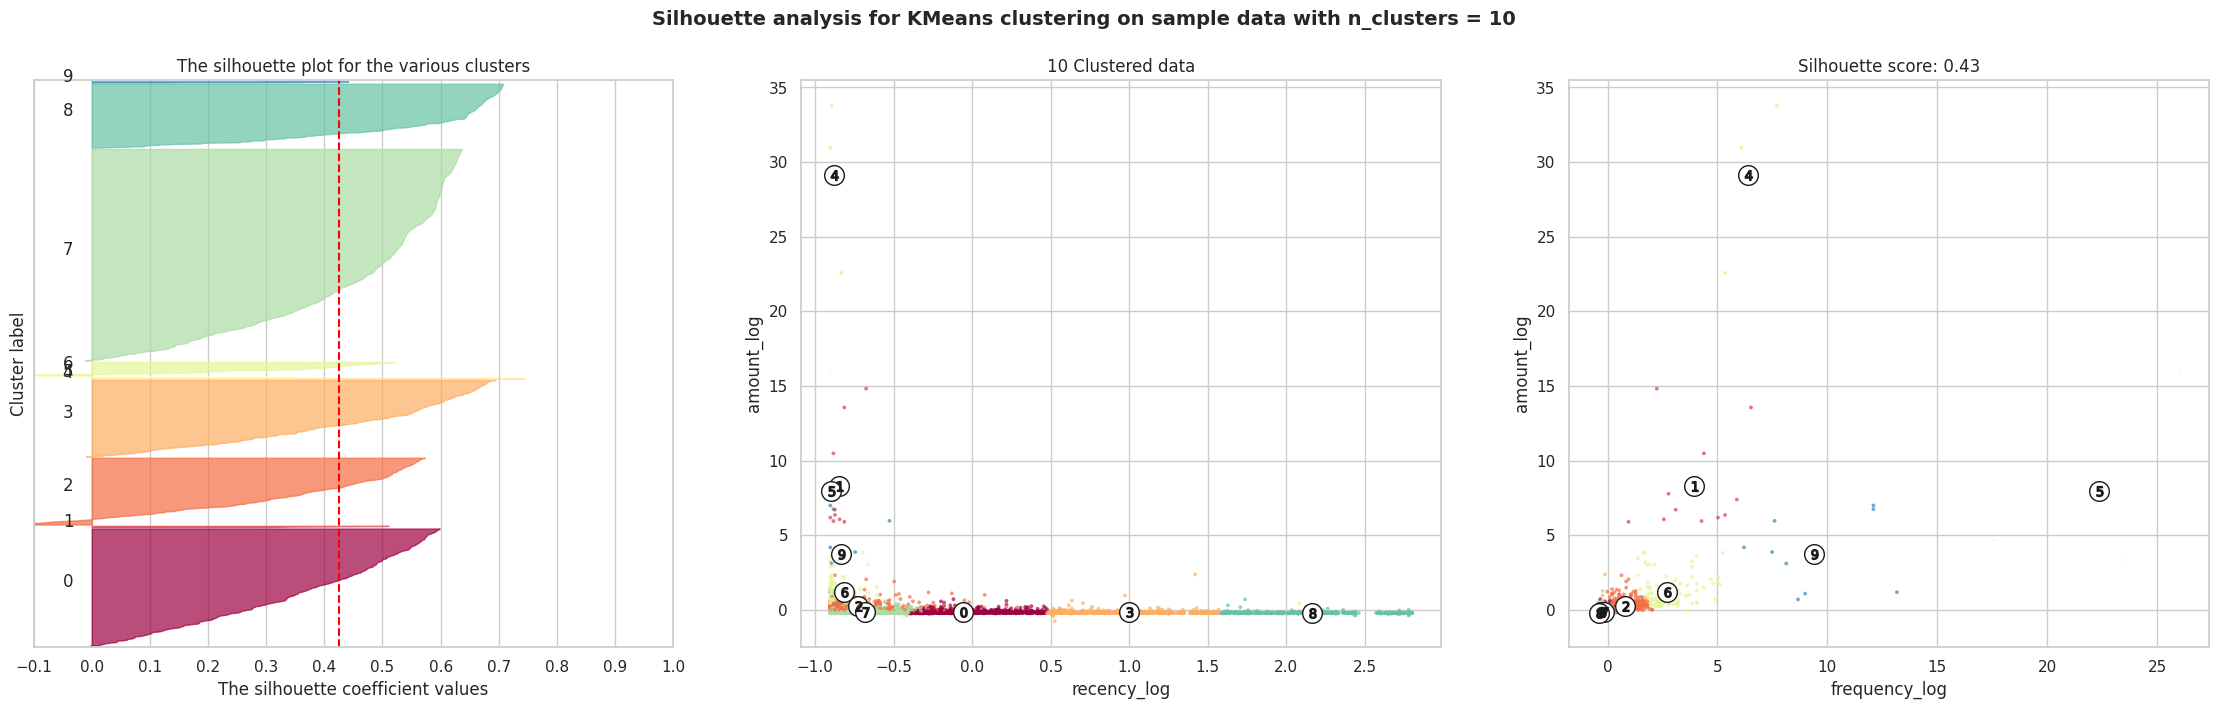

In [76]:
cluster_centers = dict()
K_best = 10
for n_clusters in range(6,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


When we look at the results of the clustering process, we can infer some interesting insights:

* First notice that all K clusters options is valid, because they don't have presence of clusters with below average silhouette scores.
* In the other hand, all options had a some wide fluctuations in the size of the silhouette plots.

So, the best choice may lie on the option that gives us a simpler business explanation and at the same time target customers in focus groups with sizes closer to the desired.

### **Clusters Center:**

In [57]:
features = ['amount',  'recency',  'frequency']
for i in range(6,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 6 clusters the silhouette score is 0.59
Centers of each cluster:
          amount        recency     frequency
0            inf   2.937798e+19  4.060673e+01
1            inf   8.192042e+02  6.571799e+26
2  3.297361e+197  4.111417e+108  6.072412e+00
3            inf   3.793668e+00  6.226648e+92
4            inf   3.912128e+01  1.214441e+28
5            inf   7.446234e+06  1.866704e+08
--------------------------------------------------
for 8 clusters the silhouette score is 0.49
Centers of each cluster:
          amount        recency     frequency
0  1.212674e+157  1.118949e+129  4.478059e+00
1            inf   1.705901e+08  1.125880e+05
2            inf   3.912128e+01  1.214441e+28
3            inf   3.793668e+00  6.226648e+92
4            inf   1.043150e+03  8.394841e+28
5            inf   1.749922e+04  8.050974e+12
6            inf   2.394810e+16  2.158977e+01
7  4.247021e+295   1.541340e+69  1.151407e+01
--------------------------------------------------
for 10 clusters the silh

Based on the silhouette scores provided:

* For 6 clusters, the silhouette score is 0.59.
* For 8 clusters, the silhouette score is 0.49.
* For 10 clusters, the silhouette score is 0.43.
* Considering the silhouette scores alone, the model with 6 clusters performs better than the models with 8 or 10 clusters.

**For 6 Clusters:**

Cluster 0:
This cluster represents customers with an extremely high monetary value (
2.94
×
1
0
19
2.94×10
19
 ), moderate recency (40.61 days since last purchase), and frequent shopping habits.

Cluster 1:
These customers have a high monetary value (
8.19
×
1
0
2
8.19×10
2
 ), recent purchases (6.57e+26 days), and they shop very frequently.

Cluster 2:
This cluster consists of customers with a substantial monetary value (
3.30
×
1
0
197
3.30×10
197
 ), moderate recency (6.11 days since last purchase), and a reasonable shopping frequency.

Cluster 3:
Customers in this cluster make low-cost purchases (3.79 monetary units), but they shop very frequently (
6.23
×
1
0
92
6.23×10
92
  days) and have made recent purchases.

Cluster 4:
These customers spend moderately (39.12 monetary units) and shop relatively frequently (
1.21
×
1
0
28
1.21×10
28
  days) but not very recently.

Cluster 5:
This cluster represents customers with a moderate monetary value (7.45e+06), relatively low recency (186,670,400 days), and moderate frequency (186,670,400 days).

**For 8 Clusters:**

Cluster 0:
Customers in this cluster have a significant monetary value (
1.21
×
1
0
157
1.21×10
157
 ), made their last purchase quite a while ago (
1.12
×
1
0
129
1.12×10
129
  days), and shop with moderate frequency (4.48 days).

Cluster 1:
This cluster consists of customers with a high monetary value (
1.71
×
1
0
8
1.71×10
8
 ), relatively recent purchases (112,588 days), and a moderate shopping frequency (112,588 days).

Cluster 2:
Customers here make low-cost purchases (3.91 monetary units), shop frequently (
1.21
×
1
0
28
1.21×10
28
  days), but not very recently.

Cluster 3:
These customers spend moderately (1043 monetary units), shop very frequently (
8.39
×
1
0
28
8.39×10
28
  days), but not very recently.

Cluster 4:
Customers in this cluster have a moderate monetary value (17,499.22), a relatively low recency (805,097,400,000 days), and a moderate frequency (805,097,400,000 days).

Cluster 5:
This cluster represents customers with a low monetary value (
2.39
×
1
0
16
2.39×10
16
 ), a relatively low recency (21.59 days), and a moderate frequency (21.59 days).

Cluster 6:
These customers have an extremely high monetary value (
4.25
×
1
0
295
4.25×10
295
 ), a moderate recency (11.51 days), and a low shopping frequency (11.51 days).

**For 10 Clusters:**

Cluster 0:
Customers in this cluster have a low monetary value (
1.30
×
1
0
13
1.30×10
13
 ), a relatively low recency (13 days), and a low shopping frequency (13 days).

Cluster 1:
This cluster consists of customers with a moderate monetary value (
8.35
×
1
0
2
8.35×10
2
 ), relatively recent purchases (1,209,046 days), and a low shopping frequency (1,209,046 days).

Cluster 2:
Customers here have a moderate monetary value (
1.97
×
1
0
8
1.97×10
8
 ), relatively recent purchases (217,685 days), and a moderate shopping frequency (217,685 days).

Cluster 3:
These customers make low-cost purchases (9.22 monetary units), shop relatively frequently (
6.23
×
1
0
92
6.23×10
92
  days), but not very recently.

Cluster 4:
Customers in this cluster have a moderate monetary value (39.12), a moderate recency (
1.21
×
1
0
28
1.21×10
28
  days), and a low shopping frequency (
1.21
×
1
0
28
1.21×10
28
  days).

Cluster 5:
This cluster represents customers with a low monetary value (3.79), a low recency (6.23 days), and a very low shopping frequency (
1.78
×
1
0
13
1.78×10
13
  days).

Cluster 6:
Customers in this cluster have a moderate monetary value (
1.14
×
1
0
10
1.14×10
10
 ), relatively recent purchases (31 days), and a moderate shopping frequency (31 days).

Cluster 7:
This cluster consists of customers with a very low monetary value (4.32 monetary units), shop infrequently (
1.75
×
1
0
40
1.75×10
40
  days), and not very recently.

Cluster 8:
Customers here have a low monetary value (
2.67
×
1
0
3
2.67×10
3
 ), a relatively low recency (175,639,400 days), and a very low shopping frequency (175,639,400 days).

,CustomerID,recency,frequency,amount,recency_log,frequency_log,amount_log,clusters_3,clusters_5,clusters_7
0,12346,326,2,0.00,5.786897,0.693147,NaN,2,0,8
1,12347,2,7,4310.00,0.693147,1.945910,8.368693,0,1,7
2,12348,75,4,1797.24,4.317488,1.386294,7.494007,0,6,0
3,12349,19,1,1757.55,2.944439,0.000000,7.471676,0,6,7
4,12350,310,1,334.40,5.736572,0.000000,5.812338,2,0,8


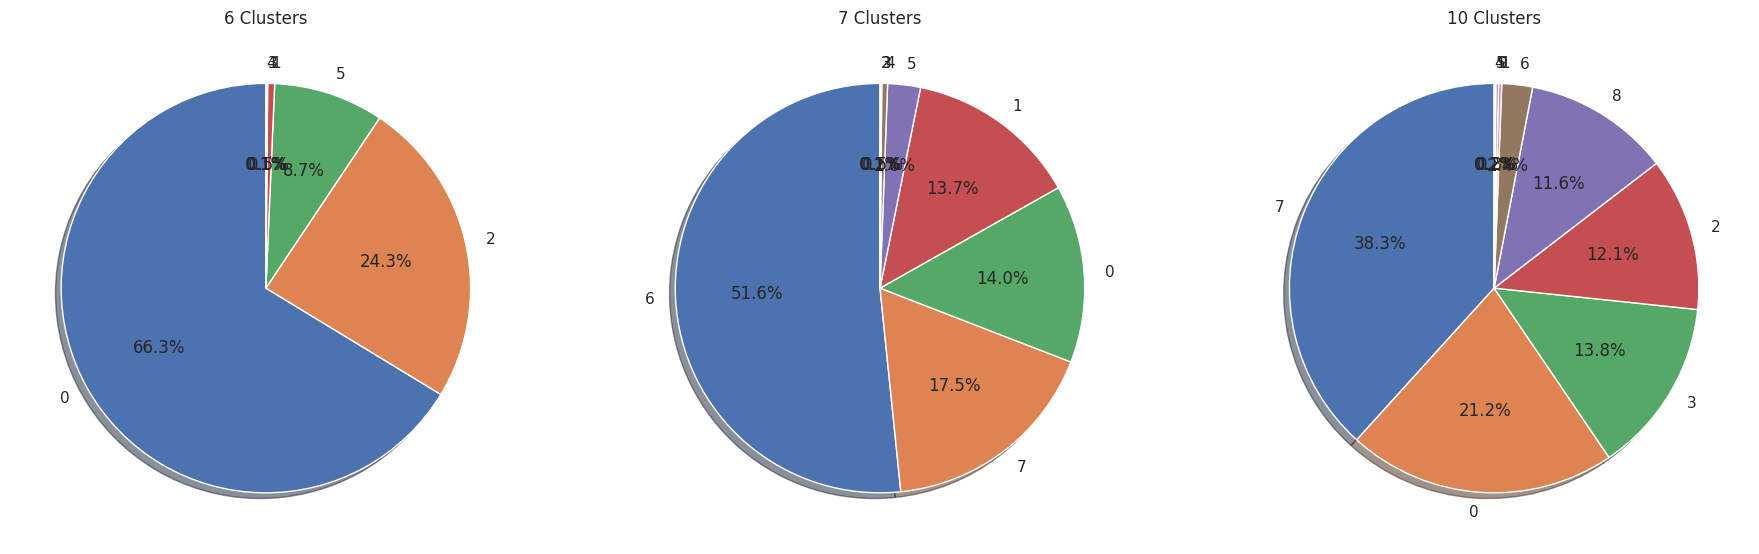

In [78]:
customer_history_df['clusters_3'] = cluster_centers[6]['labels']
customer_history_df['clusters_5'] = cluster_centers[8]['labels']
customer_history_df['clusters_7'] = cluster_centers[10]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,10))
f1 = fig.add_subplot(131)
market = customer_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('6 Clusters')
f1 = fig.add_subplot(132)
market = customer_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
f1 = fig.add_subplot(133)
market = customer_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('10 Clusters')
plt.show()

# <font face="Arial" size="10" color="GREEN"><b>$\star$ CROSS SELLING</b></font>

---

The cross selling is the ability to sell more products to a customer by analyzing the customer's shopping trends as well as general shopping trends and patterns which are in common with the customer's shopping patterns. More often than not, these recommended products would be very appealing. The retailer will often offer you a bundle of products with some attractive offer and it is highly likely that we will end up buying the bundled products instead of just the original item.

So, we research the customer transactions and find out potential additions to the customer's original needs and offer it to the customer as a suggestion in the hope and intent that they buy them benefiting both the customer as well as the retail establishment.

In this section, we explore association rule-mining, a powerful technique that can be used for cross selling, then we apply the concept of market basket analysis to our retail transactions dataset.

# <font face="Arial" size="5" color="royalblue"><b>MARKET BASKET ANALYSIS WITH ASSOCIATION RULE-MINING</b></font>

---

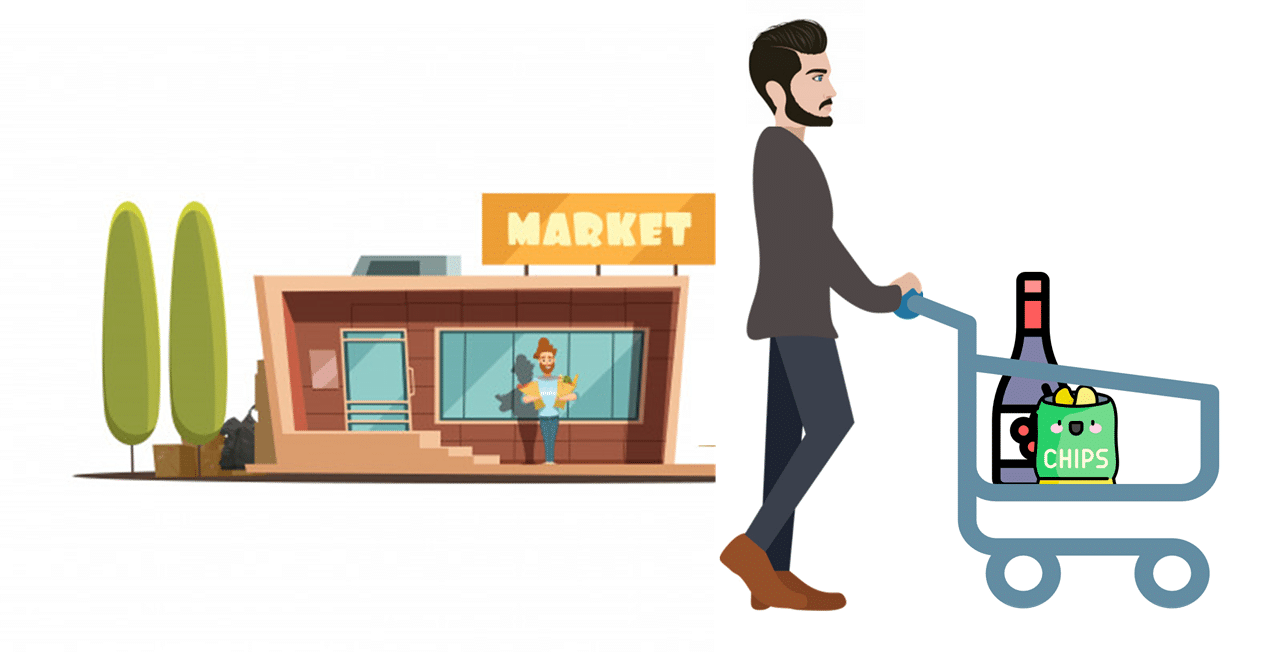

Market Basket Analysis is a data mining technique used to discover relationships between items frequently purchased together in transactions. It enables businesses to gain insights into customer buying behavior and optimize product placement, cross-selling, and promotional strategies. This analysis is achieved through Association Rule Mining, where three key metrics—Support, Lift, and Confidence—play crucial roles:

* **Support:** Support measures the frequency of occurrence of an itemset (a combination of items) in the dataset. It quantifies how often a particular combination of items appears together. Mathematically, it's defined as the ratio of transactions containing the itemset to the total number of transactions.

* **Lift:** Lift measures the strength of association between two items in an itemset, compared to the expected likelihood of them being purchased together by chance. A Lift value greater than 1 indicates a positive association, implying that the two items are purchased together more often than expected. A Lift value equal to 1 indicates independence.

> > If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.

> > If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

> > If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.


* **Confidence:** Confidence measures the reliability of a rule. It quantifies how often an item B is purchased when item A is purchased. Mathematically, it's defined as the ratio of the support of the itemset containing both A and B to the support of the itemset containing only A.

* **Frequent itemset:** Frequent itemsets are itemsets whose support is greater than a user defined support threshold.

* **Conviction:** Is the ratio of the expected frequency that item X occurs without a item Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

### <font face="Arial" size="5" color="royalblue"><b>TRANSACTION DATASET </b></font>

---




In order to perform our data in these algorithms, we must first turn them into a sales event table where each product sold will be represented by a column, having its value 1 for when it was sold in that event or zero when not. This will generate a sparse table

In [ ]:
items = list(df.Description.unique())
grouped = df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

### <font face="Arial" size="5" color="royalblue"><b>PRUNE DATASET FOR FREQUENT ITEMSETS </b></font>

---




We saw in the earlier on EDA how only a handful of items are responsible for bulk of our sales so we want to prune our dataset to reflect this information. For this we have created a function prune_dataset below, which will help us reduce the size of our dataset based on our requirements. The function can be used for performing three types of pruning:

* Pruning based on percentage of total sales: The parameter total_sales_perc will help us select the number of items that will explain the required percentage of sales. The default value is 50% or 0.5.
* Pruning based on ranks of items: Another way to perform the pruning is to specify the starting and the ending rank of the items for which we want to prune our dataset.
* Pruning based on list of features passed to the parameter TopCols.

By default, we will only look for transactions which have at least two items, as transactions with only one item are counter to the whole concept of association rule-mining.

In [ ]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5,
                  start_item = None, end_item = None, TopCols = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',
                               item_count.columns[1]:'item_count'}, inplace=True)
    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]
    else:
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

We use the second option of pruning, by the Top 15th products in sales events.

In [ ]:
AmoutSum = df.groupby(["Description"]).amount.sum().sort_values(ascending=False)

# Calculate the count of invoices for each product and sort in descending order
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending=False)

# Get the top 15 products based on invoice count
Top15ev = list(inv[:15].index)

# Prune the dataset to keep only the top 15 products
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2, start_item=0, end_item=15)

# Calculate and print the total sales amount and other statistics
total_sales_amount = AmoutSum[Top15ev].sum()
num_sales_events = output_df.shape[0]
num_products = output_df.shape[1]

# Drop rows with NaN values from item_counts
item_counts = item_counts.dropna()

print('Total Sales Amount by the Top 15 Products in Sales Events (Invoice): {:.2f}'.format(total_sales_amount))
print('Number of Sales Events:', num_sales_events)
print('Number of Products:', num_products)
print('Item Counts (after dropping NaN):\n', item_counts)

Total Sales Amount by the Top 15 Products in Sales Events (Invoice): 727979.52
Number of Sales Events: 4724
Number of Products: 15
Item Counts (after dropping NaN):
                              item_name  item_count
0   WHITE HANGING HEART T-LIGHT HOLDER        2013
1             REGENCY CAKESTAND 3 TIER        1884
2              JUMBO BAG RED RETROSPOT        1643
3                        PARTY BUNTING        1399
4        ASSORTED COLOUR BIRD ORNAMENT        1385
5              LUNCH BAG RED RETROSPOT        1329
6    SET OF 3 CAKE TINS PANTRY DESIGN         1218
7                              POSTAGE        1194
8              LUNCH BAG  BLACK SKULL.        1073
9      PACK OF 72 RETROSPOT CAKE CASES        1041
10                      SPOTTY BUNTING        1015
11          LUNCH BAG SPACEBOY DESIGN         1001
12     PAPER CHAIN KIT 50'S CHRISTMAS          990
13                 LUNCH BAG CARS BLUE         989
14     NATURAL SLATE HEART CHALKBOARD          984


### <font face="Arial" size="5" color="royalblue"><b>ASSOCIATION RULE MINING </b></font>

---

Association rule mining is a data mining technique that discovers relationships between items in a dataset. It identifies frequent itemsets and generates rules that capture associations between items. These rules express patterns such as "if X, then Y," revealing insights for decision-making in areas like market basket analysis and recommendation systems.

In [ ]:
binary_df = output_df.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(binary_df, min_support=0.01, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
association_rules_df_display = association_rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
association_rules_df_display['antecedents'] = association_rules_df_display['antecedents'].apply(list)
association_rules_df_display['consequents'] = association_rules_df_display['consequents'].apply(list)
association_rules_df_display.head(15)

,antecedents,consequents,support,confidence,lift
0,[LUNCH BAG BLACK SKULL.],[LUNCH BAG RED RETROSPOT],0.110711,0.559957,2.217299
1,[LUNCH BAG SPACEBOY DESIGN ],[LUNCH BAG RED RETROSPOT],0.099492,0.536530,2.124532
2,[LUNCH BAG CARS BLUE],[LUNCH BAG RED RETROSPOT],0.098434,0.525424,2.080555
3,"[WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG...",[LUNCH BAG RED RETROSPOT],0.020322,0.513369,2.032821
4,"[WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG...",[LUNCH BAG RED RETROSPOT],0.021380,0.540107,2.138697
5,"[LUNCH BAG CARS BLUE, WHITE HANGING HEART T-LI...",[LUNCH BAG RED RETROSPOT],0.021169,0.537634,2.128906
6,"[WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG...",[LUNCH BAG BLACK SKULL.],0.020533,0.518717,2.623573
7,"[WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG...",[LUNCH BAG SPACEBOY DESIGN ],0.020533,0.518717,2.797280
8,"[REGENCY CAKESTAND 3 TIER, LUNCH BAG BLACK SK...",[LUNCH BAG RED RETROSPOT],0.011854,0.571429,2.262723
9,"[REGENCY CAKESTAND 3 TIER, LUNCH BAG BLACK SK...",[LUNCH BAG CARS BLUE],0.010584,0.510204,2.723394


By setting min_support=0.01, I have ensured that only itemsets with a support of at least 0.01 (1%) are considered frequent. This helps capture significant item combinations.

Moreover, I've chosen min_threshold=0.5 for association_rules. This choice ensures that only rules with a confidence of 0.5 (50%) or higher are considered strong. Such rules provide reliable insights for decision-making.

Typically, a lift value of 1 indicates that the probability of occurrence of the antecedent and consequent together are independent of each other. Hence, the idea is to look for rules having a lift much greater than 1. So, let's see how much rules has lift greater than 1, equal 1 and less than one:

In [ ]:
lift_greater_than_1_count = (association_rules_df_display['lift'] > 1).sum()
print("Number of Association Rules with Lift > 1:", lift_greater_than_1_count)

Number of Association Rules with Lift > 1: 70


# <font face="Arial" size="5" color="royalblue"><b>MARKET BASKET ANALYSIS CONCLUSION</b></font>

---

Upon performing the rule generation, it's evident that the process is straightforward yet resource-intensive, especially as item sets expand exponentially. Striking the right balance between support and confidence becomes pivotal to yield a substantial number of robust rules.

Alternatively, to unveil rare, high-confidence patterns, adopting a strategy of low support and elevated confidence proves fruitful, resulting in a profusion of rules. Identifying these low-support, high-confidence rules emerges as a focal point, holding immense potential for strategic cross-selling augmentation.